In [14]:
# Loading Data
import pandas as pd
import numpy as np
import nltk

df = pd.read_excel("C:/Users/Mirtha/Downloads/Source Code Skripsi/New Code/Data.xlsx")
df = df.fillna('')
df


,Project Name,Nama Fitur,User Story,Scenario,Scenario.1,Scenario.2,Scenario.3,Scenario.4,Scenario.5,Scenario.6,Scenario.7,Scenario.8,Scenario.9,Scenario.10,Effort
0,Akobesi,Login,As User\nI want to login with username and pas...,Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
1,Akobesi,Logout,As User\nI want to logout from my account\nSo ...,Scenario: Log out Successfully \nGiven I am on...,,,,,,,,,,,S
2,Akobesi,Reset Password,As User\nI want to reset my password\nSo that ...,Scenario: Password Reset Successfully\nGiven I...,Scenario: Password Reset Failed due to a misma...,,,,,,,,,,M
3,Akobesi,Change Password,As User\nI want to change my password\nSo that...,Scenario: Password Change Successfully\nGiven ...,Scenario: Password Change Failed due to a mism...,Scenario: Password Change Failed due to incorr...,,,,,,,,,S
4,Akobesi,Create Program outcome,As Curriculum Team\nI want to create Program o...,Scenario: Create Program outcome Successfully\...,Scenario: Create Program outcome Failed as the...,Scenario: Create Program outcome Failed Due to...,,,,,,,,,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,User Story Generator,Update user story,"As User\nI want to update user story, linked t...",Scenario: Update user story successfully\nGive...,Scenario: Update user story failed due to empt...,,,,,,,,,,S
219,User Story Generator,Create user story scenario,As User\nI want to access the generated user s...,Scenario: Create user story scenario successfu...,Scenario: Create user story scenario failed du...,,,,,,,,,,XL
220,User Story Generator,Update user story scenario,"As User\nI want to update user story scenario,...",Scenario: Update user story scenario successfu...,Scenario: Update user story scenario failed du...,,,,,,,,,,S
221,User Story Generator,Read user story History,As User\nI want to retrieve user story created...,Scenario: Read user story History Successfully...,Scenario: Read user story history failed due t...,,,,,,,,,,S


In [15]:
# Menggabungkan Data Setiap Kolom
df['combined'] = df.iloc[:, 1:13].apply(lambda x: '\n'.join(x), axis=1)

# Menampilkan hasil gabungan setiap kolom
df['combined']

0      Login\nAs User\nI want to login with username ...
1      Logout\nAs User\nI want to logout from my acco...
2      Reset Password\nAs User\nI want to reset my pa...
3      Change Password\nAs User\nI want to change my ...
4      Create Program outcome\nAs Curriculum Team\nI ...
                             ...                        
218    Update user story\nAs User\nI want to update u...
219    Create user story scenario\nAs User\nI want to...
220    Update user story scenario\nAs User\nI want to...
221    Read user story History\nAs User\nI want to re...
222    Delete user story History\nAs User\nI want to ...
Name: combined, Length: 223, dtype: object

In [16]:
# Menampilkan baris pertama dari kolom 'combined'
print(df['combined'].iloc[0])

Login
As User
I want to login with username and password
So that I can access the system
Scenario: Login Successfully as Admin 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “32525252523”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/admin”
And the “Lecturer Name” field should contain “Admin”
Scenario: Login Successfully as Curriculum Team Member
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “197801262006041001”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/curriculum”
And the “Lecturer Name” field should contain “Badrus Zaman, S.Kom., M.Cs.”	
Scenario: Login Successfully as Lecturer 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “198110282006041003”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/lect

In [17]:
# Menggabungkan data hingga user story
# Fungsi untuk memeriksa dan menggabungkan
def combine_with_scenario(row):
    combined = row[1]  # Mulai dengan kolom pertama
    combined += '\n' + row[2]
    for value in row[2:]:
        paragraphs = value.split('\n')
        for paragraph in paragraphs:
            if 'scenario:' in paragraph.lower():
                combined += '\n' + paragraph
    return combined

# Terapkan fungsi ke DataFrame
df['combined_user_story'] = df.iloc[:, [1,2]].apply(lambda x: '\n'.join(x), axis=1)

# Menampilkan hasil gabungan
print(df['combined_user_story'])

0      Login\nAs User\nI want to login with username ...
1      Logout\nAs User\nI want to logout from my acco...
2      Reset Password\nAs User\nI want to reset my pa...
3      Change Password\nAs User\nI want to change my ...
4      Create Program outcome\nAs Curriculum Team\nI ...
                             ...                        
218    Update user story\nAs User\nI want to update u...
219    Create user story scenario\nAs User\nI want to...
220    Update user story scenario\nAs User\nI want to...
221    Read user story History\nAs User\nI want to re...
222    Delete user story History\nAs User\nI want to ...
Name: combined_user_story, Length: 223, dtype: object


In [18]:
# Menampilkan baris pertama dari kolom 'combined'
print(df['combined_user_story'].iloc[0])

Login
As User
I want to login with username and password
So that I can access the system


In [19]:
# Menggabungkan data hingga user story scenario
df['combined_scenario'] = df.apply(combine_with_scenario, axis=1)

# Menampilkan hasil gabungan
print(df['combined_scenario'])

C:\Users\Mirtha\AppData\Local\Temp\ipykernel_3192\682605823.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  combined = row[1]  # Mulai dengan kolom pertama
C:\Users\Mirtha\AppData\Local\Temp\ipykernel_3192\682605823.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  combined += '\n' + row[2]


0      Login\nAs User\nI want to login with username ...
1      Logout\nAs User\nI want to logout from my acco...
2      Reset Password\nAs User\nI want to reset my pa...
3      Change Password\nAs User\nI want to change my ...
4      Create Program outcome\nAs Curriculum Team\nI ...
                             ...                        
218    Update user story\nAs User\nI want to update u...
219    Create user story scenario\nAs User\nI want to...
220    Update user story scenario\nAs User\nI want to...
221    Read user story History\nAs User\nI want to re...
222    Delete user story History\nAs User\nI want to ...
Name: combined_scenario, Length: 223, dtype: object


In [20]:
# Menampilkan baris pertama dari kolom 'combined'
print(df['combined_scenario'].iloc[0])

Login
As User
I want to login with username and password
So that I can access the system
Scenario: Login Successfully as Admin 
Scenario: Login Successfully as Curriculum Team Member
Scenario: Login Successfully as Lecturer 
Scenario: Login Failed due to Incorrect NIP or Password
Scenario: Login Successfully as Admin 
Scenario: Login Successfully as Curriculum Team Member
Scenario: Login Successfully as Lecturer 
Scenario: Login Failed due to Incorrect NIP or Password


In [21]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Transform 'Effort' column
effort_encoded = encoder.fit_transform(df[['Effort']])

# Convert the encoded effort to a dense array
effort_dense_array = effort_encoded.toarray()

# Display the encoded result
print("Encoded 'Effort' categories:")
for label, encoded_label in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    print(f"{label}: {encoded_label}")

# Display the dense array
print("Dense array representation of encoded 'Effort' categories:")
print(effort_dense_array)

Encoded 'Effort' categories:
L: 0
M: 1
S: 2
XL: 3
Dense array representation of encoded 'Effort' categories:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0

Class distribution:
L: 0.04
M: 0.22
S: 0.70
XL: 0.05
Total count of each class:
L: 8.0
M: 49.0
S: 155.0
XL: 11.0


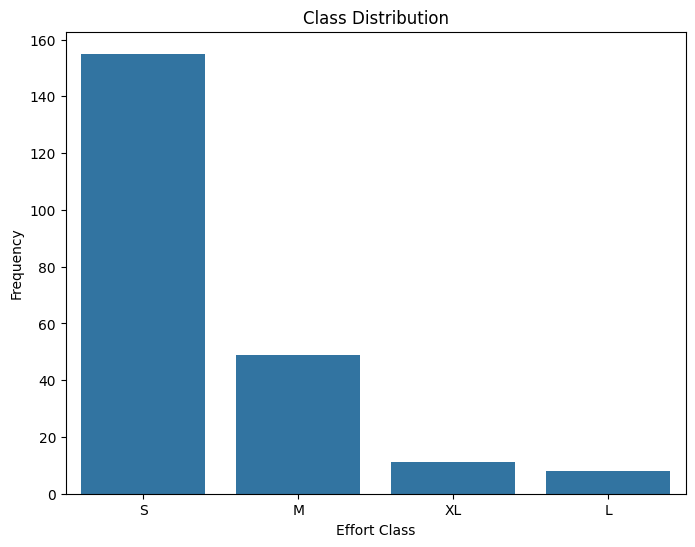

In [22]:
# Distribusi Kelas Keseluruhan
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class distribution
class_distribution = np.sum(effort_dense_array, axis=0) / len(effort_dense_array)

# Display class distribution
print("Class distribution:")
for label, distribution in zip(encoder.categories_[0], class_distribution):
    print(f"{label}: {distribution:.2f}")
# Calculate total count of each class
class_totals = np.sum(effort_dense_array, axis=0)

# Display total count of each class
print("Total count of each class:")
for label, total in zip(encoder.categories_[0], class_totals):
    print(f"{label}: {total}")

# Hitung total dari setiap kelas dalam target variabel (Effort)
class_distribution = df['Effort'].value_counts()

# Visualisasikan distribusi kelas menggunakan plot bar
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Effort Class')
plt.ylabel('Frequency')
plt.show()

Class distribution per project:
Effort                                  L         M         S        XL
Project Name                                                           
Akobesi                          0.047244  0.244094  0.700787  0.007874
DFD Generator                    0.000000  0.230769  0.615385  0.153846
Git Trackr                       0.000000  0.333333  0.500000  0.166667
Jisebi Checker                   0.000000  0.111111  0.777778  0.111111
Journal Database Reviewer        0.125000  0.125000  0.687500  0.062500
Novelty Checker                  0.000000  0.090909  0.818182  0.090909
Sales Monitoring on Multimarket  0.000000  0.333333  0.666667  0.000000
Seareq                           0.000000  0.000000  0.750000  0.250000
Ucase                            0.000000  0.250000  0.625000  0.125000
User Story Generator             0.000000  0.090909  0.727273  0.181818


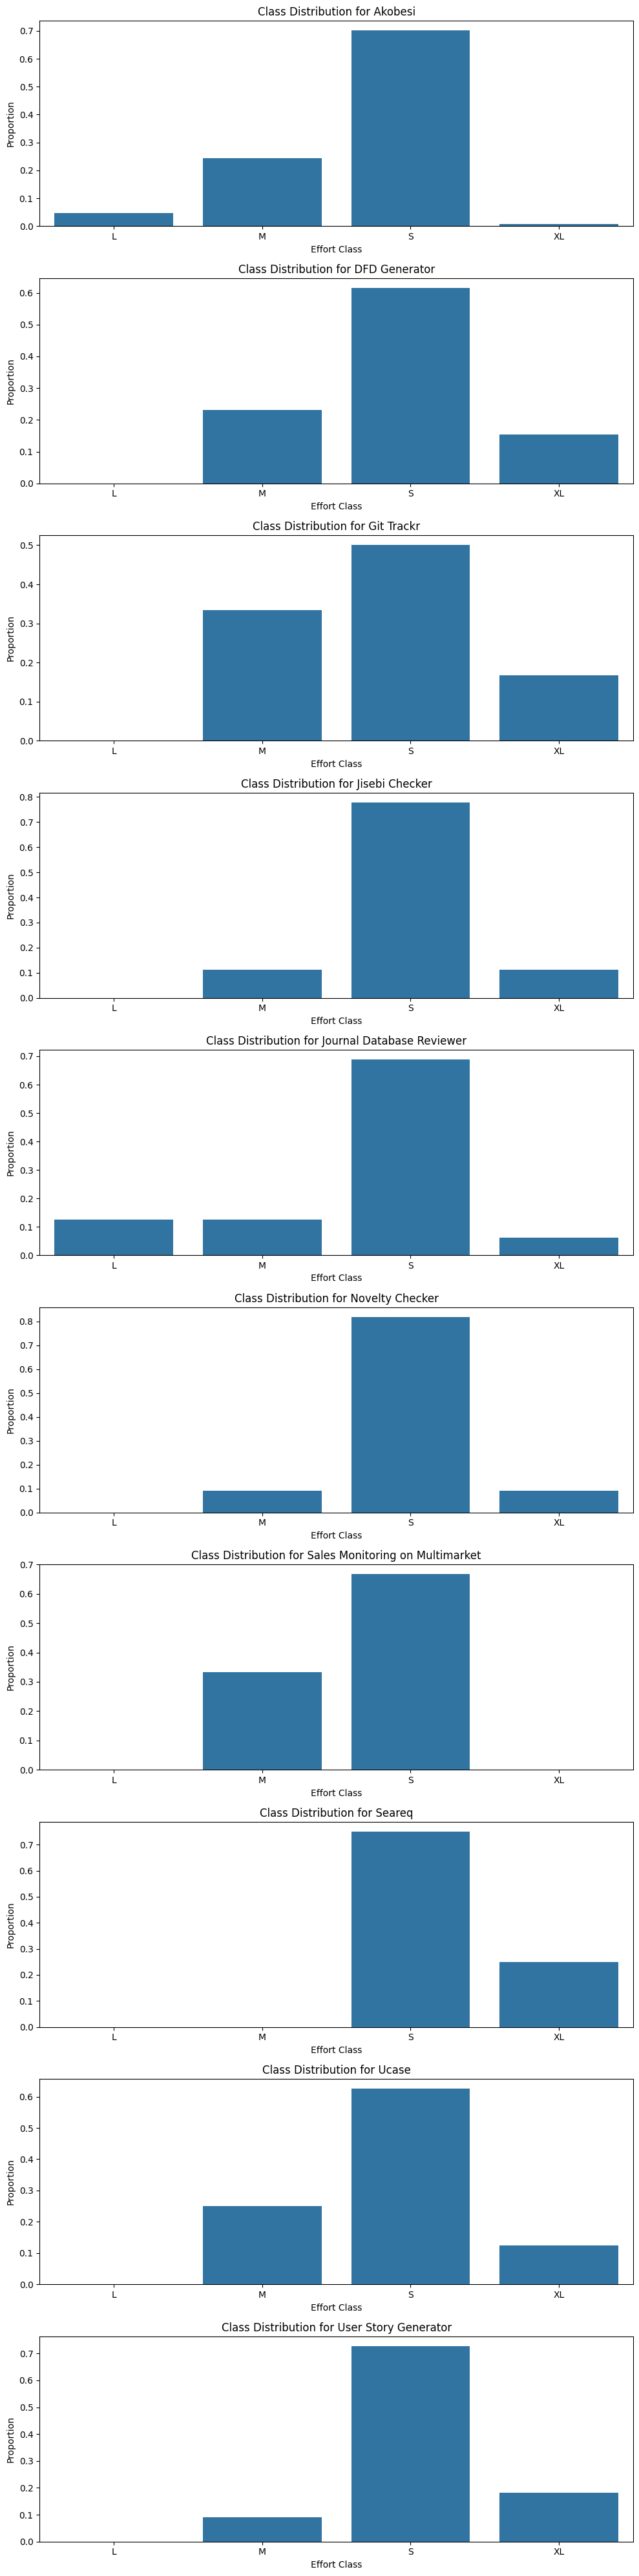

In [23]:
# Group by project name and calculate class distribution per project
project_class_distribution = df.groupby('Project Name')['Effort'].value_counts(normalize=True).unstack().fillna(0)

# Display class distribution per project
print("Class distribution per project:")
print(project_class_distribution)

# Visualisasi distribusi kelas per proyek
fig, axes = plt.subplots(nrows=len(project_class_distribution), figsize=(10, len(project_class_distribution) * 4))

for (project, class_dist), ax in zip(project_class_distribution.iterrows(), axes):
    sns.barplot(x=class_dist.index, y=class_dist.values, ax=ax)
    ax.set_title(f'Class Distribution for {project}')
    ax.set_xlabel('Effort Class')
    ax.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [24]:
# Case Folding and Remove Template
import re

def case_folding(text):
    return text.lower()

def remove_template_phrases(text):
    template_texts = [
        "So that",
        "As",
        "I want",
        "linked to",
        "I am on",
        "I press",
        "I follow",
        "I fill in",
        "I select",
        "I check",
        "I uncheck",
        "I attach the file",
        "I should see",
        "The response should contain",
        "field should contain",
        "checkbox should be checked",
        "checkbox should not be checked",
        "I should be on",
        "The url should match",
        "given",
        "when",
        "then"
    ]

    pattern = r'\s+(' + '|'.join(template_texts) + r')\s+'
    return re.sub(pattern, ' ', text, flags=re.IGNORECASE)

df['combined'] = df['combined'].apply(case_folding)
df['remove_template'] = df['combined'].apply(remove_template_phrases)

df['combined_user_story'] = df['combined_user_story'].apply(case_folding)
df['remove_template_user_story'] = df['combined_user_story'].apply(remove_template_phrases)

df['combined_scenario'] = df['combined_scenario'].apply(case_folding)
df['remove_template_scenario'] = df['combined_scenario'].apply(remove_template_phrases)

In [25]:
# Remove Punctuation
import string
def remove_punctuation(text):
    punctuation_to_replace = string.punctuation + "‘’“”"
    translation_table = str.maketrans(punctuation_to_replace, ' ' * len(punctuation_to_replace))
    cleaned_text = text.translate(translation_table)
    return cleaned_text

df['remove_punctuation'] = df['remove_template'].apply(remove_punctuation)
df['remove_punctuation_user_story'] = df['remove_template_user_story'].apply(remove_punctuation)
df['remove_punctuation_scenario'] = df['remove_template_scenario'].apply(remove_punctuation)
print("Hasil pembersihan teks dari tanda baca")
print(df.loc[0, 'remove_punctuation'])

Hasil pembersihan teks dari tanda baca
login user to login with username and password i can access the system
scenario  login successfully admin i am on  http   127 0 0 1 8000 login  i fill in  nip  with  32525252523 
and  password  with  coba123 
and  login  the url should match  http   127 0 0 1 8000 dashboard admin 
and the  lecturer name   admin 
scenario  login successfully curriculum team member i am on  http   127 0 0 1 8000 login  i fill in  nip  with  197801262006041001 
and  password  with  coba123 
and  login  the url should match  http   127 0 0 1 8000 dashboard curriculum 
and the  lecturer name   badrus zaman  s kom   m cs  	
scenario  login successfully lecturer i am on  http   127 0 0 1 8000 login  i fill in  nip  with  198110282006041003 
and  password  with  coba123 
and  login  the url should match  http   127 0 0 1 8000 dashboard lecturer 
and the  lecturer name   indra kharisma r  s kom   m t  
scenario  login failed due to incorrect nip or password i am on  http  

In [26]:
# Tokenisasi
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df['tokenisasi'] = df['remove_punctuation'].apply(lambda x: word_tokenize(x))
df['tokenisasi_user_story'] = df['remove_punctuation_user_story'].apply(lambda x: word_tokenize(x))
df['tokenisasi_scenario'] = df['remove_punctuation_scenario'].apply(lambda x: word_tokenize(x))
print("Hasil tokenisasi")
print(df['tokenisasi'])

Hasil tokenisasi
0      [login, user, to, login, with, username, and, ...
1      [logout, user, to, logout, from, my, account, ...
2      [reset, password, user, to, reset, my, passwor...
3      [change, password, user, to, change, my, passw...
4      [create, program, outcome, curriculum, team, t...
                             ...                        
218    [update, user, story, user, to, update, user, ...
219    [create, user, story, scenario, user, to, acce...
220    [update, user, story, scenario, user, to, upda...
221    [read, user, story, history, user, to, retriev...
222    [delete, user, story, history, user, to, delet...
Name: tokenisasi, Length: 223, dtype: object


In [27]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Stopword removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

df['stopword_removal'] = df['tokenisasi'].apply(remove_stopwords)
df['stopword_removal_user_story'] = df['tokenisasi_user_story'].apply(remove_stopwords)
df['stopword_removal_scenario'] = df['tokenisasi_scenario'].apply(remove_stopwords)
print("Hasil stopword removal")
print(df['stopword_removal'][4])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...


Hasil stopword removal
['create', 'program', 'outcome', 'curriculum', 'team', 'create', 'program', 'outcome', 'define', 'program', 'outcome', 'scenario', 'create', 'program', 'outcome', 'successfully', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'curriculum', 'press', 'data', 'program', 'outcome', 'program', 'outcome', 'page', 'press', 'add', 'program', 'outcome', 'creation', 'page', 'fill', 'program', 'outcome', 'code', 'po1', 'program', 'outcome', 'description', 'graduates', 'possess', 'ability', 'analyze', 'design', 'create', 'comprehensively', 'evaluate', 'information', 'systems', 'alignment', 'organizational', 'goals', 'demonstrating', 'effective', 'proficiency', 'add', 'program', 'outcome', 'response', 'contain', 'success', 'program', 'outcome', 'added', 'scenario', 'create', 'program', 'outcome', 'failed', 'program', 'outcome', 'code', 'already', 'taken', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'curriculum', 'press', 'data', 'program', 'outcome', 'program', 'ou

[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# Lematisasi
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['lematisasi'] = df['stopword_removal'].apply(lemmatize_tokens)
df['lematisasi_user_story'] = df['stopword_removal_user_story'].apply(lemmatize_tokens)
df['lematisasi_scenario'] = df['stopword_removal_scenario'].apply(lemmatize_tokens)
print("Hasil lematisasi")
df['lematisasi']

Hasil lematisasi


0      [login, user, login, username, password, acces...
1      [logout, user, logout, account, prevent, unaut...
2      [reset, password, user, reset, password, regai...
3      [change, password, user, change, password, sec...
4      [create, program, outcome, curriculum, team, c...
                             ...                        
218    [update, user, story, user, update, user, stor...
219    [create, user, story, scenario, user, access, ...
220    [update, user, story, scenario, user, update, ...
221    [read, user, story, history, user, retrieve, u...
222    [delete, user, story, history, user, delete, u...
Name: lematisasi, Length: 223, dtype: object

In [29]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengembalikan ke bentuk string
df['lematisasi'] = df['lematisasi'].apply(lambda x: ' '.join(x))
df['lematisasi_user_story'] = df['lematisasi_user_story'].apply(lambda x: ' '.join(x))
df['lematisasi_scenario'] = df['lematisasi_scenario'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lematisasi'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_matrix_user_story = tfidf_vectorizer.fit_transform(df['lematisasi_user_story'])
tfidf_df_user_story  = pd.DataFrame(tfidf_matrix_user_story.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_matrix_scenario = tfidf_vectorizer.fit_transform(df['lematisasi_scenario'])
tfidf_df_scenario = pd.DataFrame(tfidf_matrix_scenario.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,04,100,105,127,15,197101042008121001,197102111997021001,197801262006041001,198105082005012001,198110282006041003,...,world,wth,x0002,xl,xlslence,xlslent,xlsx,yamamaru,year,zaman
0,0.0,0.0,0.0,0.113618,0.0,0.0,0.0,0.092818,0.0,0.110888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092818
1,0.0,0.0,0.0,0.130649,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.074771,0.0,0.0,0.0,0.000000,0.0,0.056758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.053876,0.0,0.0,0.0,0.000000,0.0,0.092017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.026421,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.0,0.0,0.0,0.028498,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
219,0.0,0.0,0.0,0.044466,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
220,0.0,0.0,0.0,0.041463,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
221,0.0,0.0,0.0,0.046888,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         6
           M       0.33      0.06      0.11        31
           S       0.72      0.99      0.83        89
          XL       0.00      0.00      0.00         1

   micro avg       0.70      0.71      0.70       127
   macro avg       0.26      0.26      0.23       127
weighted avg       0.58      0.71      0.61       127
 samples avg       0.70      0.71      0.70       127

Precision: 0.582741181742526     Recall: 0.7086614173228346      Accuracy: 0.6929133858267716      F1 Score: 0.6081743606628467

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

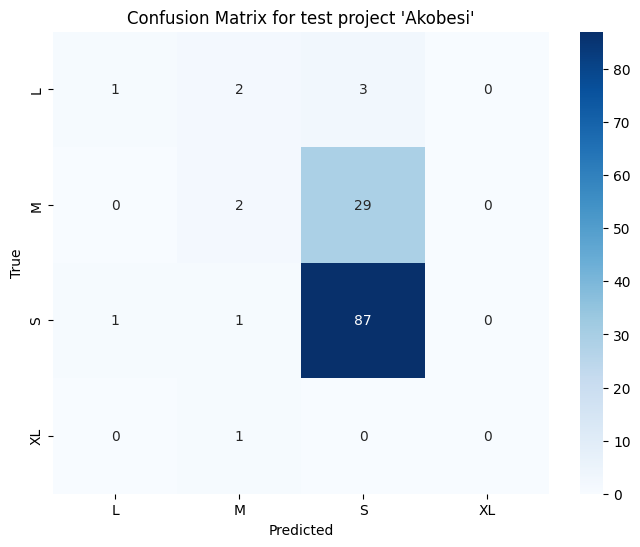

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         6
           M       0.20      0.03      0.06        31
           S       0.77      0.81      0.79        89
          XL       0.00      0.00      0.00         1

   micro avg       0.74      0.57      0.65       127
   macro avg       0.24      0.21      0.21       127
weighted avg       0.59      0.57      0.57       127
 samples avg       0.57      0.57      0.57       127

Precision: 0.585592226503602     Recall: 0.5748031496062992      Accuracy: 0.5748031496062992      F1 Score: 0.5650000717123475

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

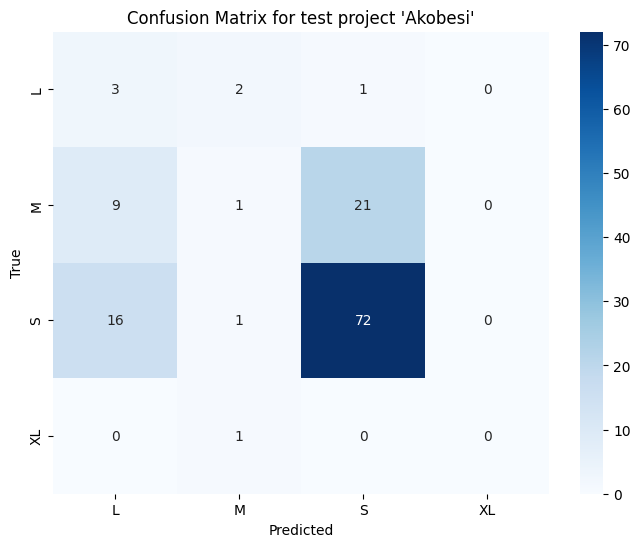

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         6
           M       0.00      0.00      0.00        31
           S       0.71      1.00      0.83        89
          XL       0.00      0.00      0.00         1

   micro avg       0.71      0.70      0.70       127
   macro avg       0.18      0.25      0.21       127
weighted avg       0.50      0.70      0.58       127
 samples avg       0.70      0.70      0.70       127

Precision: 0.4950006249218848     Recall: 0.7007874015748031      Accuracy: 0.7007874015748031      F1 Score: 0.580186778978209

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

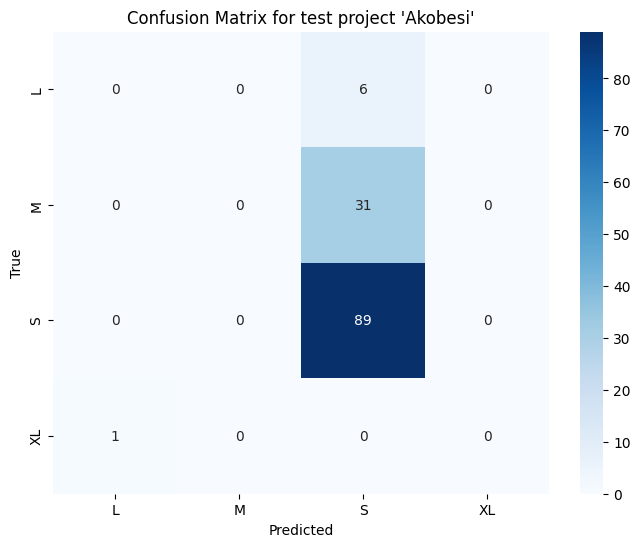

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         7
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         9
   macro avg       0.75      0.75      0.75         9
weighted avg       1.00      1.00      1.00         9
 samples avg       1.00      1.00      1.00         9

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

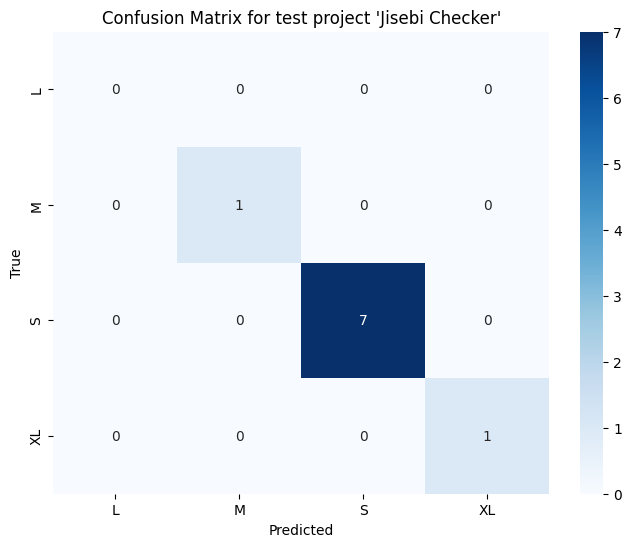

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         7
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         9
   macro avg       0.75      0.75      0.75         9
weighted avg       1.00      1.00      1.00         9
 samples avg       1.00      1.00      1.00         9

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

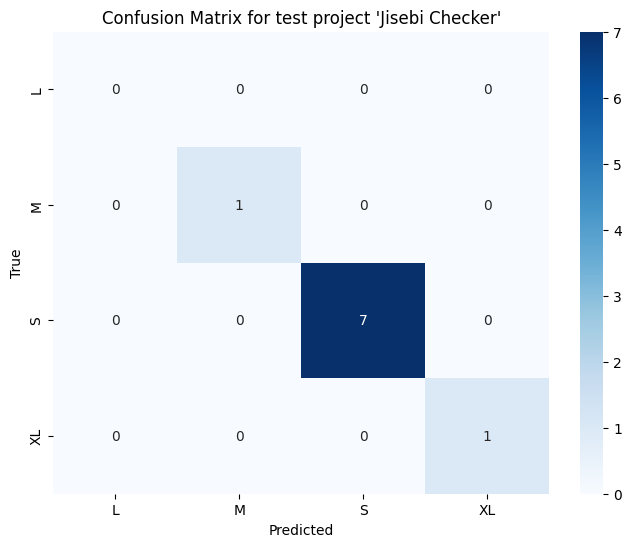

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.78      1.00      0.88         7
          XL       0.00      0.00      0.00         1

   micro avg       0.78      0.78      0.78         9
   macro avg       0.19      0.25      0.22         9
weighted avg       0.60      0.78      0.68         9
 samples avg       0.78      0.78      0.78         9

Precision: 0.6049382716049383     Recall: 0.7777777777777778      Accuracy: 0.7777777777777778      F1 Score: 0.6805555555555557

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

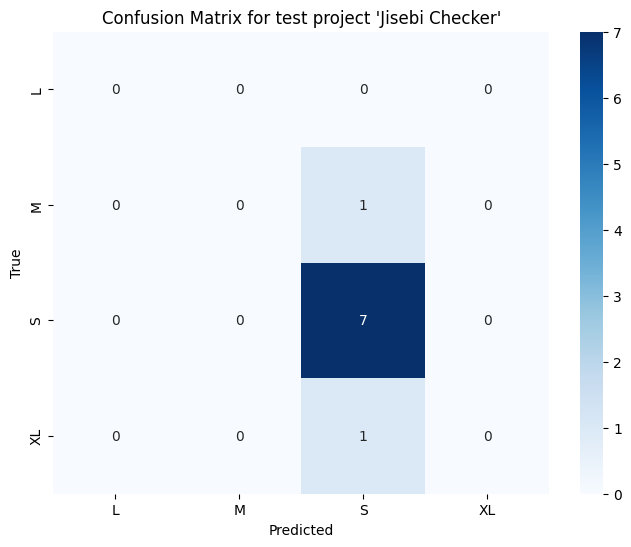

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      0.89      0.94         9
          XL       1.00      1.00      1.00         1

   micro avg       1.00      0.91      0.95        11
   macro avg       0.75      0.72      0.74        11
weighted avg       1.00      0.91      0.95        11
 samples avg       0.91      0.91      0.91        11

Precision: 1.0     Recall: 0.9090909090909091      Accuracy: 0.9090909090909091      F1 Score: 0.9518716577540107

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

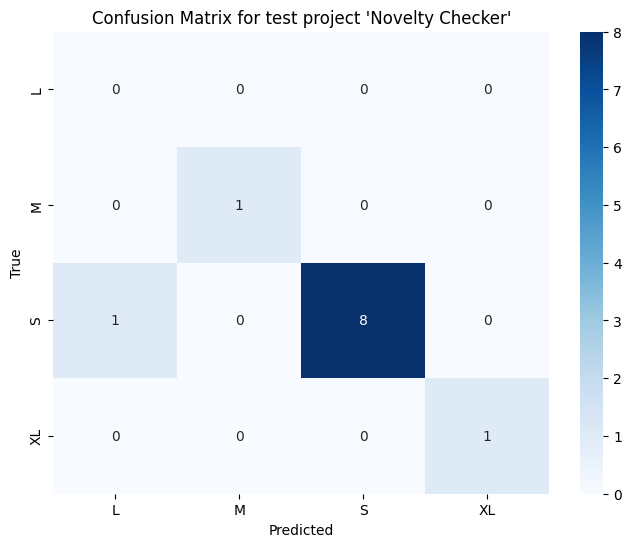

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.50      1.00      0.67         1
           S       1.00      0.78      0.88         9
          XL       1.00      1.00      1.00         1

   micro avg       0.90      0.82      0.86        11
   macro avg       0.62      0.69      0.64        11
weighted avg       0.95      0.82      0.87        11
 samples avg       0.77      0.82      0.79        11

Precision: 0.9545454545454546     Recall: 0.8181818181818182      Accuracy: 0.7272727272727273      F1 Score: 0.8674242424242425

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

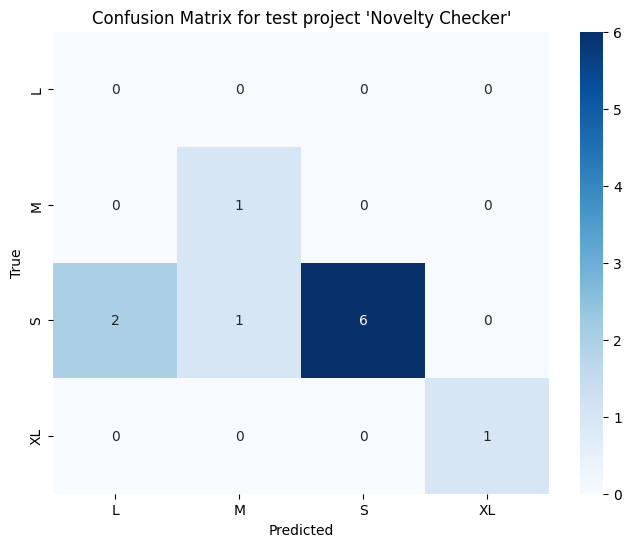

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.89      0.89      0.89         9
          XL       0.00      0.00      0.00         1

   micro avg       0.89      0.73      0.80        11
   macro avg       0.22      0.22      0.22        11
weighted avg       0.73      0.73      0.73        11
 samples avg       0.73      0.73      0.73        11

Precision: 0.7272727272727273     Recall: 0.7272727272727273      Accuracy: 0.7272727272727273      F1 Score: 0.7272727272727273

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

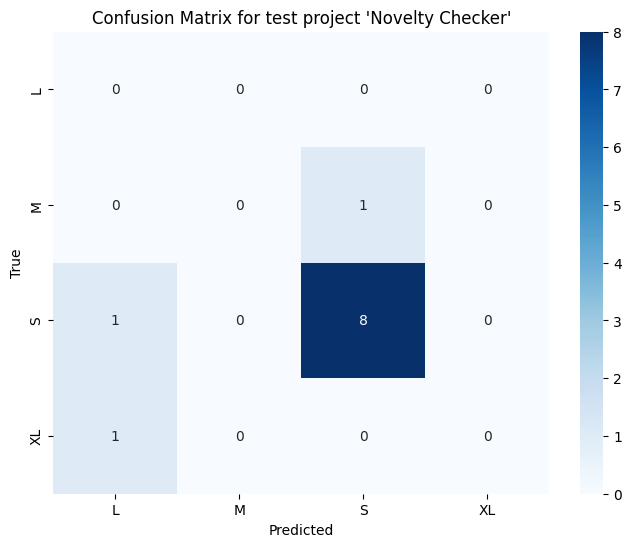

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         2
           M       0.40      1.00      0.57         2
           S       0.83      0.91      0.87        11
          XL       1.00      1.00      1.00         1

   micro avg       0.72      0.81      0.76        16
   macro avg       0.56      0.73      0.61        16
weighted avg       0.69      0.81      0.73        16
 samples avg       0.75      0.81      0.77        16

Precision: 0.6854166666666668     Recall: 0.8125      Accuracy: 0.6875      F1 Score: 0.7317546583850931

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


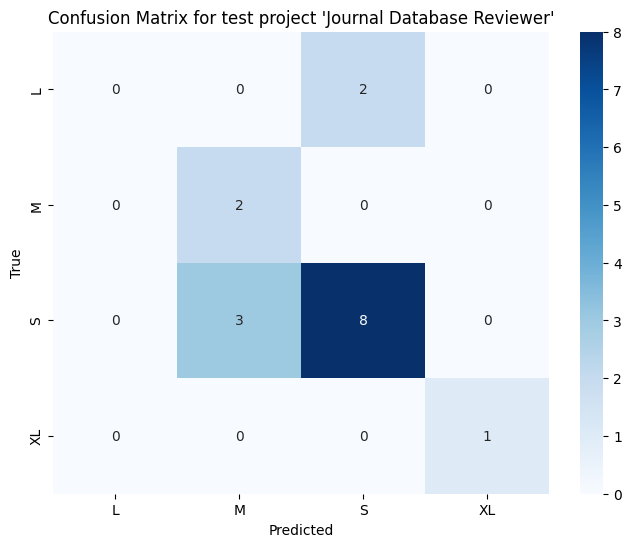

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         2
           M       0.20      0.50      0.29         2
           S       0.89      0.73      0.80        11
          XL       1.00      1.00      1.00         1

   micro avg       0.67      0.62      0.65        16
   macro avg       0.52      0.56      0.52        16
weighted avg       0.70      0.62      0.65        16
 samples avg       0.59      0.62      0.60        16

Precision: 0.6986111111111111     Recall: 0.625      Accuracy: 0.5625      F1 Score: 0.6482142857142856

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

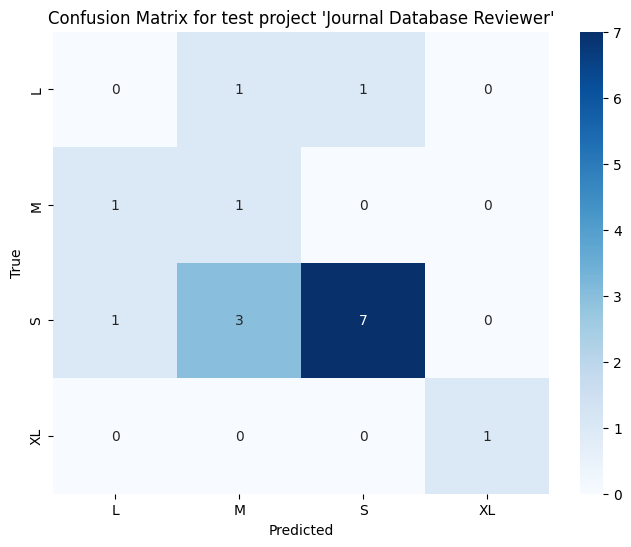

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         2
           M       1.00      0.50      0.67         2
           S       0.69      1.00      0.81        11
          XL       0.00      0.00      0.00         1

   micro avg       0.71      0.75      0.73        16
   macro avg       0.42      0.38      0.37        16
weighted avg       0.60      0.75      0.64        16
 samples avg       0.72      0.75      0.73        16

Precision: 0.59765625     Recall: 0.75      Accuracy: 0.6875      F1 Score: 0.6435185185185185

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


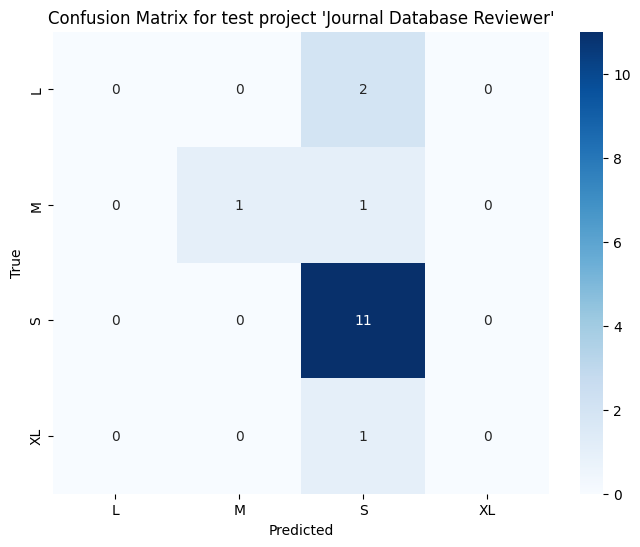

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.60      1.00      0.75         3
          XL       1.00      1.00      1.00         1

   micro avg       0.67      0.67      0.67         6
   macro avg       0.40      0.50      0.44         6
weighted avg       0.47      0.67      0.54         6
 samples avg       0.67      0.67      0.67         6

Precision: 0.4666666666666666     Recall: 0.6666666666666666      Accuracy: 0.6666666666666666      F1 Score: 0.5416666666666666

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

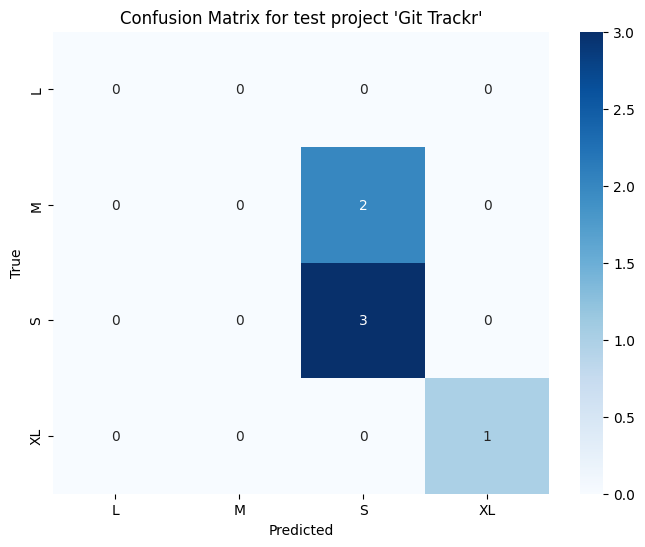

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.75      1.00      0.86         3
          XL       1.00      1.00      1.00         1

   micro avg       0.67      0.67      0.67         6
   macro avg       0.44      0.50      0.46         6
weighted avg       0.54      0.67      0.60         6
 samples avg       0.58      0.67      0.61         6

Precision: 0.5416666666666666     Recall: 0.6666666666666666      Accuracy: 0.5      F1 Score: 0.5952380952380952

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

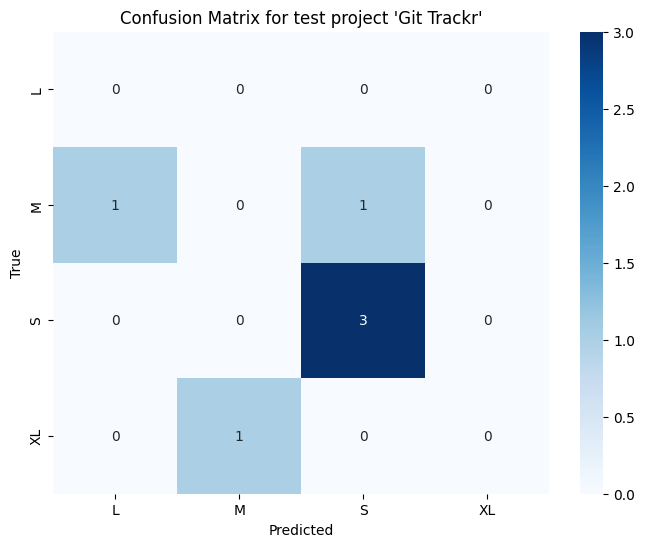

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.50      1.00      0.67         3
          XL       0.00      0.00      0.00         1

   micro avg       0.50      0.50      0.50         6
   macro avg       0.12      0.25      0.17         6
weighted avg       0.25      0.50      0.33         6
 samples avg       0.50      0.50      0.50         6

Precision: 0.25     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.3333333333333333

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

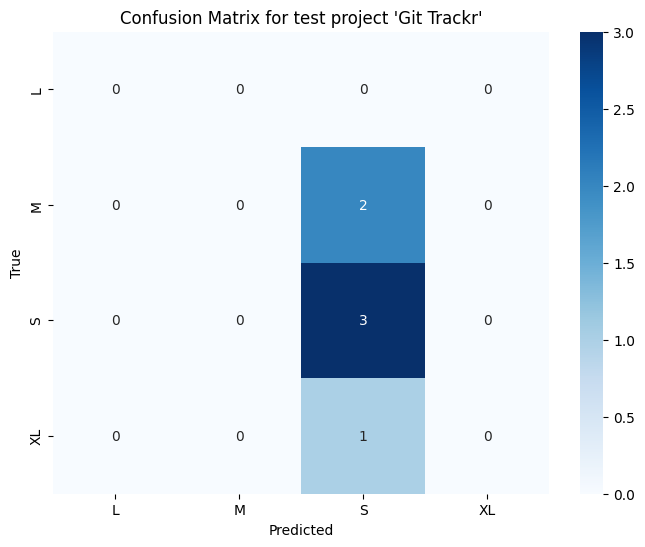

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80         3
          XL       1.00      1.00      1.00         1

   micro avg       0.50      0.75      0.60         4
   macro avg       0.50      0.42      0.45         4
weighted avg       1.00      0.75      0.85         4
 samples avg       0.50      0.75      0.58         4

Precision: 1.0     Recall: 0.75      Accuracy: 0.25      F1 Score: 0.8500000000000001

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

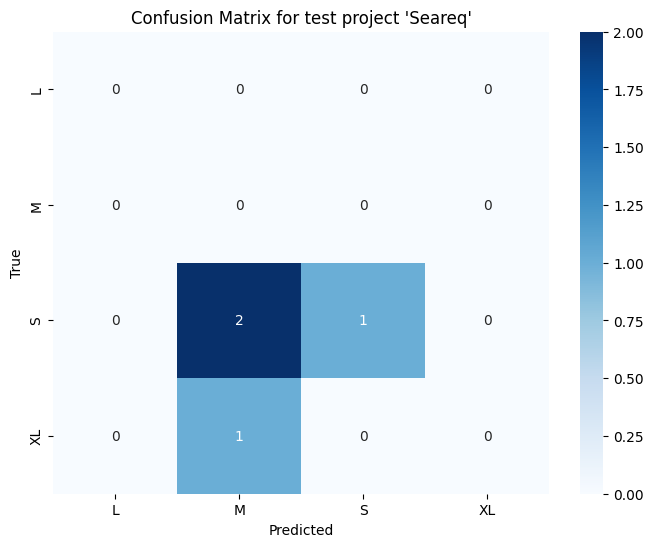

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.67      0.67      0.67         3
          XL       1.00      1.00      1.00         1

   micro avg       0.75      0.75      0.75         4
   macro avg       0.42      0.42      0.42         4
weighted avg       0.75      0.75      0.75         4
 samples avg       0.62      0.75      0.67         4

Precision: 0.75     Recall: 0.75      Accuracy: 0.5      F1 Score: 0.75

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

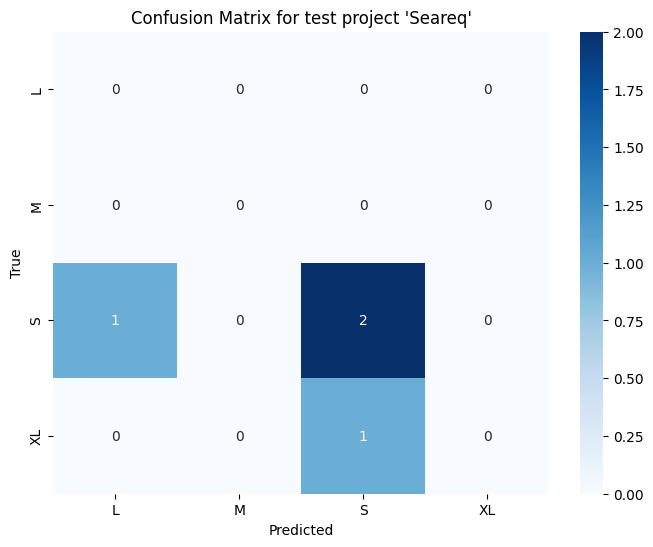

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.75      1.00      0.86         3
          XL       0.00      0.00      0.00         1

   micro avg       0.75      0.75      0.75         4
   macro avg       0.19      0.25      0.21         4
weighted avg       0.56      0.75      0.64         4
 samples avg       0.75      0.75      0.75         4

Precision: 0.5625     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.6428571428571428

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

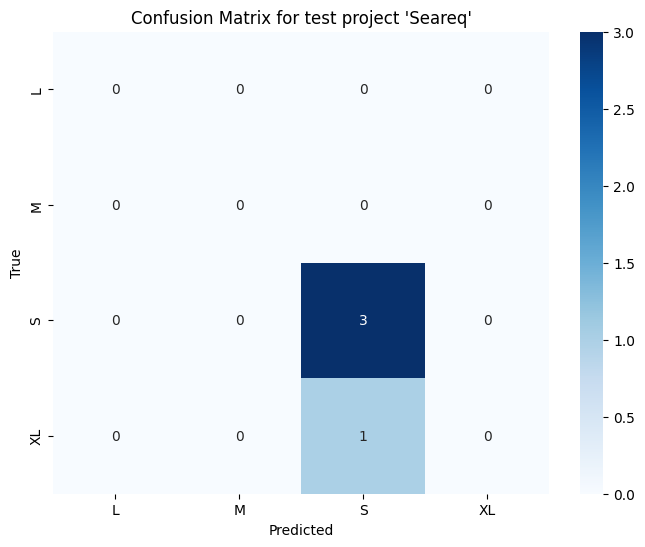

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.17      0.29         6
           S       0.75      1.00      0.86        12
          XL       0.00      0.00      0.00         0

   micro avg       0.76      0.72      0.74        18
   macro avg       0.44      0.29      0.29        18
weighted avg       0.83      0.72      0.67        18
 samples avg       0.72      0.72      0.72        18

Precision: 0.8333333333333334     Recall: 0.7222222222222222      Accuracy: 0.7222222222222222      F1 Score: 0.6666666666666665

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

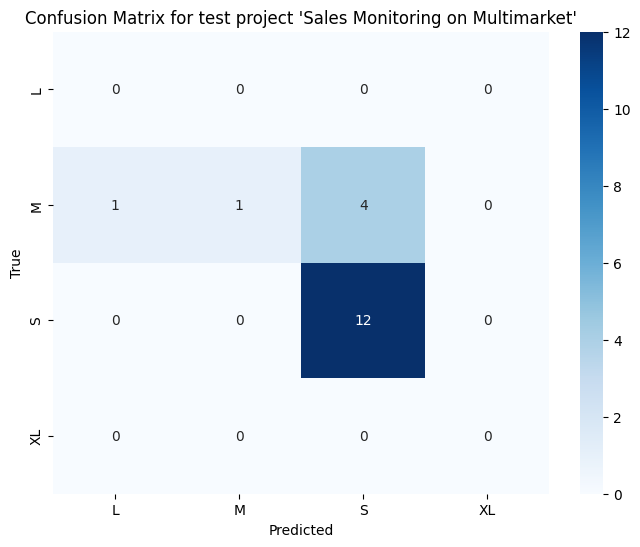

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.17      0.29         6
           S       0.77      0.83      0.80        12
          XL       0.00      0.00      0.00         0

   micro avg       0.79      0.61      0.69        18
   macro avg       0.44      0.25      0.27        18
weighted avg       0.85      0.61      0.63        18
 samples avg       0.61      0.61      0.61        18

Precision: 0.8461538461538463     Recall: 0.6111111111111112      Accuracy: 0.6111111111111112      F1 Score: 0.6285714285714286

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

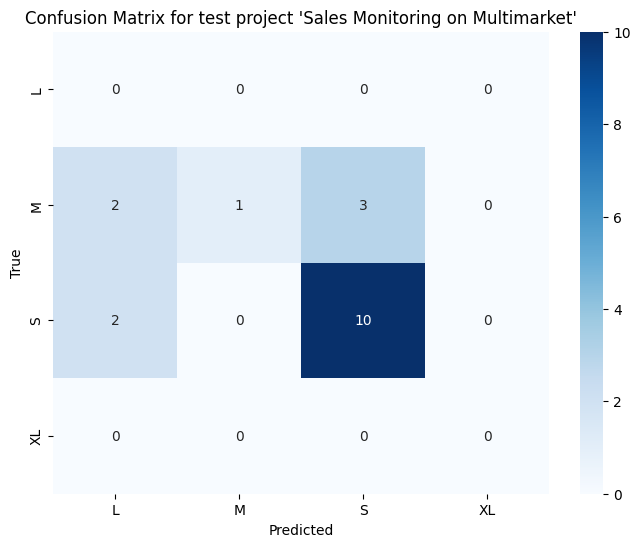

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         6
           S       0.67      1.00      0.80        12
          XL       0.00      0.00      0.00         0

   micro avg       0.67      0.67      0.67        18
   macro avg       0.17      0.25      0.20        18
weighted avg       0.44      0.67      0.53        18
 samples avg       0.67      0.67      0.67        18

Precision: 0.4444444444444444     Recall: 0.6666666666666666      Accuracy: 0.6666666666666666      F1 Score: 0.5333333333333334

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

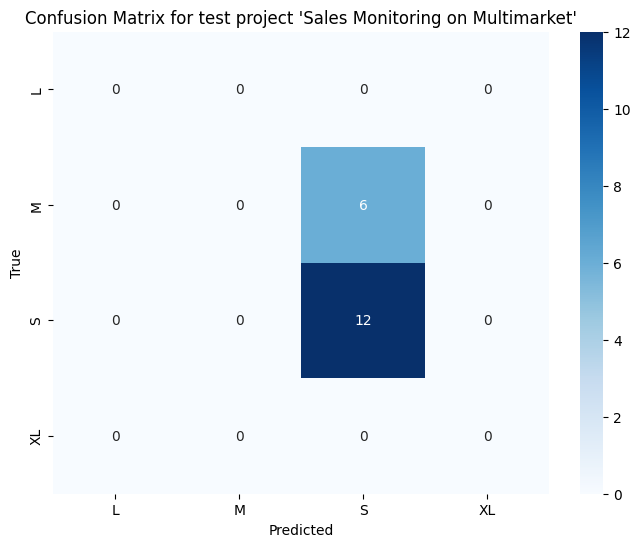

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         2
           S       1.00      1.00      1.00         5
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         8
   macro avg       0.75      0.75      0.75         8
weighted avg       1.00      1.00      1.00         8
 samples avg       1.00      1.00      1.00         8

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

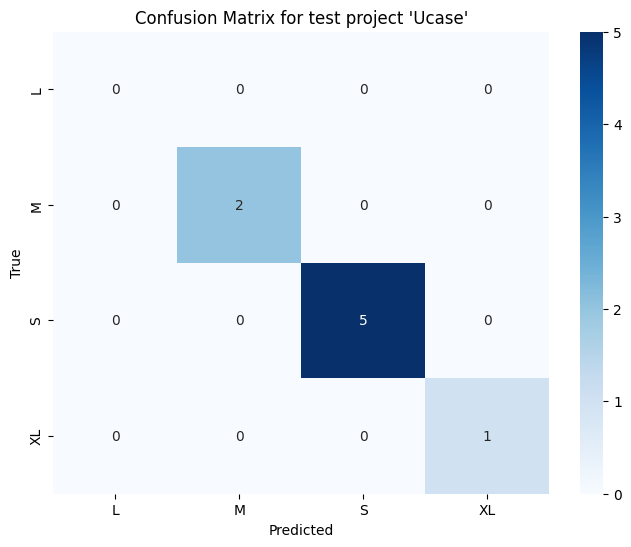

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.50      0.67         2
           S       0.83      1.00      0.91         5
          XL       1.00      1.00      1.00         1

   micro avg       0.88      0.88      0.88         8
   macro avg       0.71      0.62      0.64         8
weighted avg       0.90      0.88      0.86         8
 samples avg       0.81      0.88      0.83         8

Precision: 0.8958333333333334     Recall: 0.875      Accuracy: 0.75      F1 Score: 0.8598484848484848

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

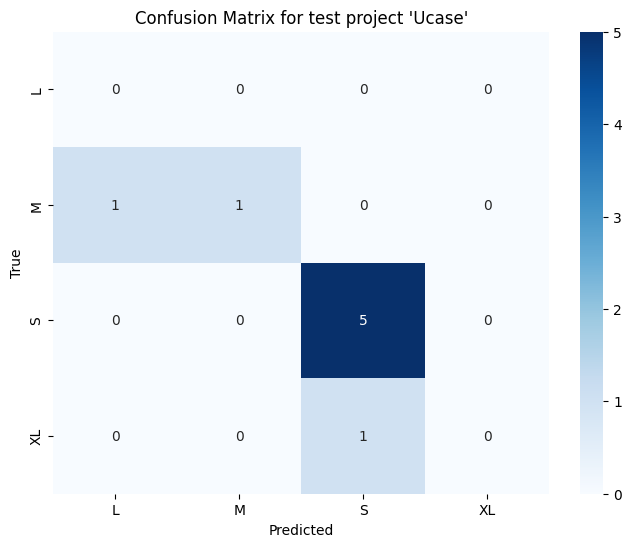

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.62      1.00      0.77         5
          XL       0.00      0.00      0.00         1

   micro avg       0.62      0.62      0.62         8
   macro avg       0.16      0.25      0.19         8
weighted avg       0.39      0.62      0.48         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.390625     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.4807692307692308

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

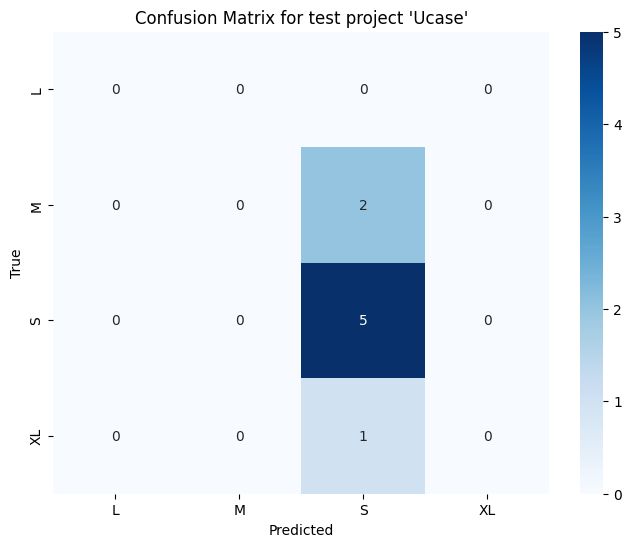

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.33      0.50         3
           S       0.80      1.00      0.89         8
          XL       1.00      1.00      1.00         2

   micro avg       0.85      0.85      0.85        13
   macro avg       0.70      0.58      0.60        13
weighted avg       0.88      0.85      0.82        13
 samples avg       0.85      0.85      0.85        13

Precision: 0.8769230769230769     Recall: 0.8461538461538461      Accuracy: 0.8461538461538461      F1 Score: 0.8162393162393162

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

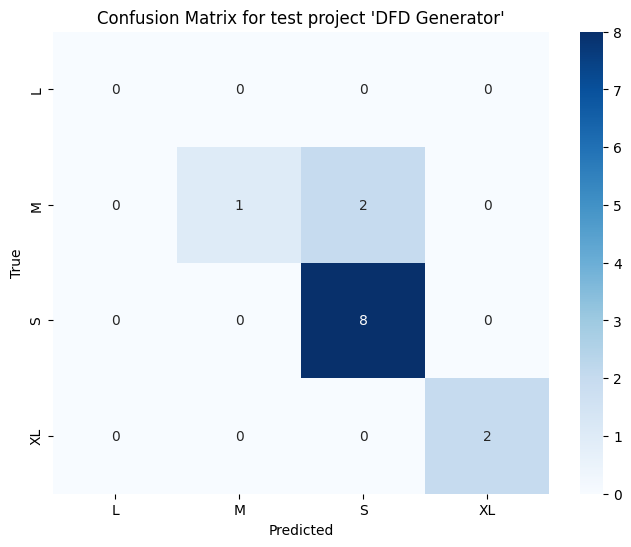

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.75      1.00      0.86         3
           S       1.00      0.88      0.93         8
          XL       1.00      1.00      1.00         2

   micro avg       0.92      0.92      0.92        13
   macro avg       0.69      0.72      0.70        13
weighted avg       0.94      0.92      0.93        13
 samples avg       0.92      0.92      0.92        13

Precision: 0.9423076923076923     Recall: 0.9230769230769231      Accuracy: 0.9230769230769231      F1 Score: 0.926007326007326

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

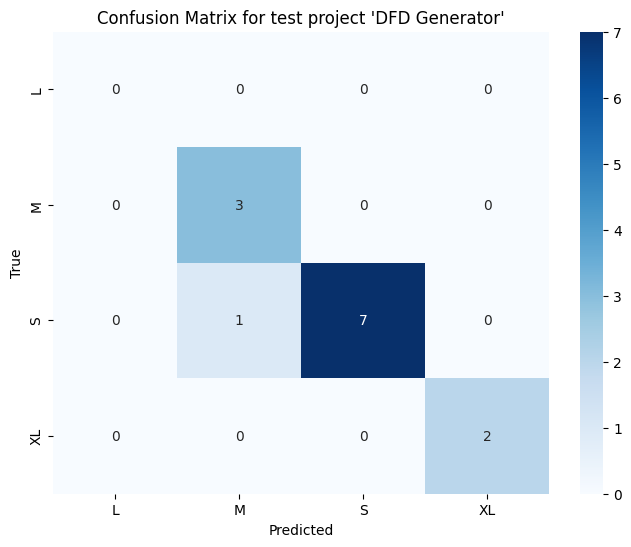

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         3
           S       0.62      1.00      0.76         8
          XL       0.00      0.00      0.00         2

   micro avg       0.62      0.62      0.62        13
   macro avg       0.15      0.25      0.19        13
weighted avg       0.38      0.62      0.47        13
 samples avg       0.62      0.62      0.62        13

Precision: 0.37869822485207105     Recall: 0.6153846153846154      Accuracy: 0.6153846153846154      F1 Score: 0.4688644688644689

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

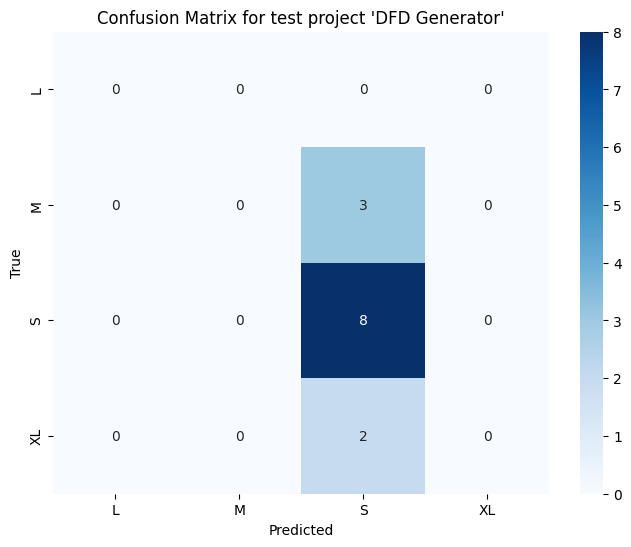

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.50      1.00      0.67         1
           S       1.00      0.75      0.86         8
          XL       1.00      1.00      1.00         2

   micro avg       0.90      0.82      0.86        11
   macro avg       0.62      0.69      0.63        11
weighted avg       0.95      0.82      0.87        11
 samples avg       0.82      0.82      0.82        11

Precision: 0.9545454545454546     Recall: 0.8181818181818182      Accuracy: 0.8181818181818182      F1 Score: 0.8658008658008658

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

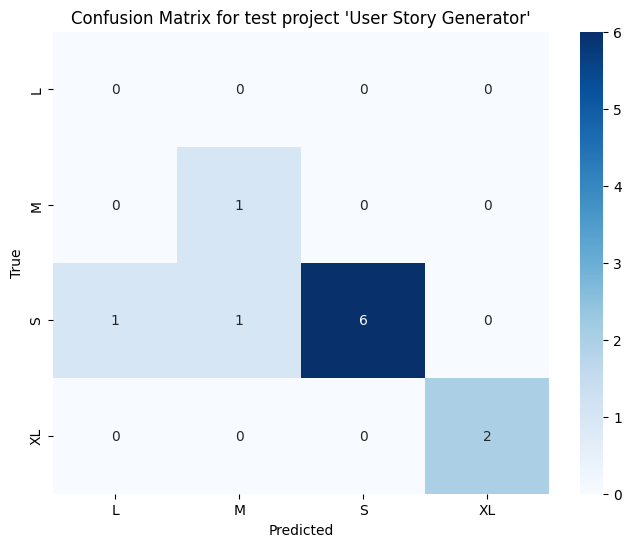

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.20      1.00      0.33         1
           S       1.00      1.00      1.00         8
          XL       1.00      1.00      1.00         2

   micro avg       0.73      1.00      0.85        11
   macro avg       0.55      0.75      0.58        11
weighted avg       0.93      1.00      0.94        11
 samples avg       0.82      1.00      0.88        11

Precision: 0.9272727272727272     Recall: 1.0      Accuracy: 0.6363636363636364      F1 Score: 0.9393939393939394

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

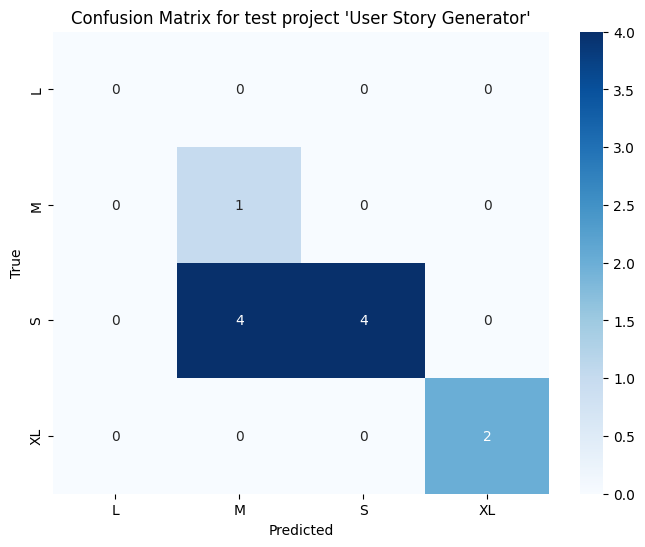

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.73      1.00      0.84         8
          XL       0.00      0.00      0.00         2

   micro avg       0.73      0.73      0.73        11
   macro avg       0.18      0.25      0.21        11
weighted avg       0.53      0.73      0.61        11
 samples avg       0.73      0.73      0.73        11

Precision: 0.5289256198347108     Recall: 0.7272727272727273      Accuracy: 0.7272727272727273      F1 Score: 0.6124401913875599

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

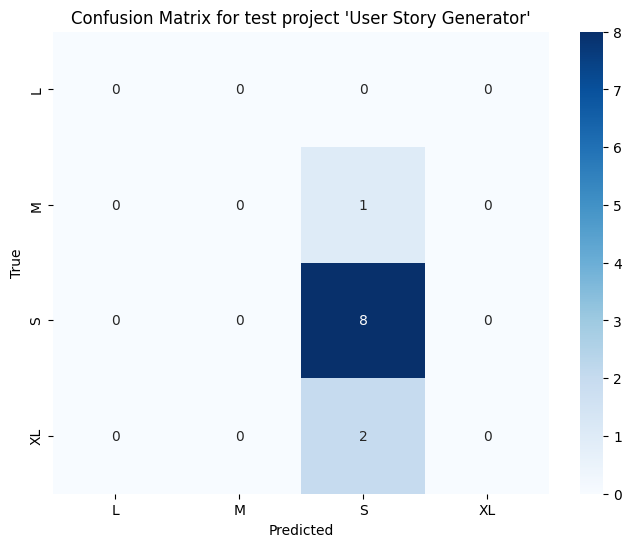

In [30]:
# Model (Teks) <== TF-IDF
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

unique_projects = df['Project Name'].unique()

accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())

# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    test_indices = test_project_data.index
    X_test = tfidf_df.loc[test_indices]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    train_indices = train_projects_data.index
    X_train = tfidf_df.loc[train_indices]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)

In [31]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost': precision_list_Adaboost,
    'Recall_Adaboost': recall_list_Adaboost,
    'Accuracy_Adaboost': accuracy_list_Adaboost,
    'F1_Score_Adaboost': f1_score_list_Adaboost,
    'Precision_DecisionTree': precision_list_DecisionTree,
    'Recall_DecisionTree': recall_list_DecisionTree,
    'Accuracy_DecisionTree': accuracy_list_DecisionTree,
    'F1_Score_DecisionTree': f1_score_list_DecisionTree,
    'Precision_MultinomialNB': precision_list_MultinomialNB,
    'Recall_MultinomialNB': recall_list_MultinomialNB,
    'Accuracy_MultinomialNB': accuracy_list_MultinomialNB,
    'F1_Score_MultinomialNB': f1_score_list_MultinomialNB,
}

# Buat DataFrame
df_result = pd.DataFrame(data)

# Tampilkan DataFrame
df_result


,Project,Precision_Adaboost,Recall_Adaboost,Accuracy_Adaboost,F1_Score_Adaboost,Precision_DecisionTree,Recall_DecisionTree,Accuracy_DecisionTree,F1_Score_DecisionTree,Precision_MultinomialNB,Recall_MultinomialNB,Accuracy_MultinomialNB,F1_Score_MultinomialNB
0,Akobesi,0.582741,0.708661,0.692913,0.608174,0.585592,0.574803,0.574803,0.565000,0.495001,0.700787,0.700787,0.580187
1,Jisebi Checker,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.604938,0.777778,0.777778,0.680556
2,Novelty Checker,1.000000,0.909091,0.909091,0.951872,0.954545,0.818182,0.727273,0.867424,0.727273,0.727273,0.727273,0.727273
3,Journal Database Reviewer,0.685417,0.812500,0.687500,0.731755,0.698611,0.625000,0.562500,0.648214,0.597656,0.750000,0.687500,0.643519
4,Git Trackr,0.466667,0.666667,0.666667,0.541667,0.541667,0.666667,0.500000,0.595238,0.250000,0.500000,0.500000,0.333333
5,Seareq,1.000000,0.750000,0.250000,0.850000,0.750000,0.750000,0.500000,0.750000,0.562500,0.750000,0.750000,0.642857
6,Sales Monitoring on Multimarket,0.833333,0.722222,0.722222,0.666667,0.846154,0.611111,0.611111,0.628571,0.444444,0.666667,0.666667,0.533333
7,Ucase,1.000000,1.000000,1.000000,1.000000,0.895833,0.875000,0.750000,0.859848,0.390625,0.625000,0.625000,0.480769
8,DFD Generator,0.876923,0.846154,0.846154,0.816239,0.942308,0.923077,0.923077,0.926007,0.378698,0.615385,0.615385,0.468864
9,User Story Generator,0.954545,0.818182,0.818182,0.865801,0.927273,1.000000,0.636364,0.939394,0.528926,0.727273,0.727273,0.612440


In [32]:
# Mean Accuracy
mean_accuracy.append(np.mean(accuracy_list_Adaboost))
mean_accuracy.append(np.mean(accuracy_list_DecisionTree))
mean_accuracy.append(np.mean(accuracy_list_MultinomialNB))

print("Mean Accuracy")
print(mean_accuracy)

Mean Accuracy
[0.7592728848142234, 0.6785127547430697, 0.6777661915949318]


====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         6
           M       1.00      0.03      0.06        31
           S       0.71      1.00      0.83        89
          XL       0.00      0.00      0.00         1

   micro avg       0.71      0.71      0.71       127
   macro avg       0.43      0.26      0.22       127
weighted avg       0.74      0.71      0.60       127
 samples avg       0.71      0.71      0.71       127

Precision: 0.7390951131108612     Recall: 0.7086614173228346      Accuracy: 0.7086614173228346      F1 Score: 0.5954426844900201

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


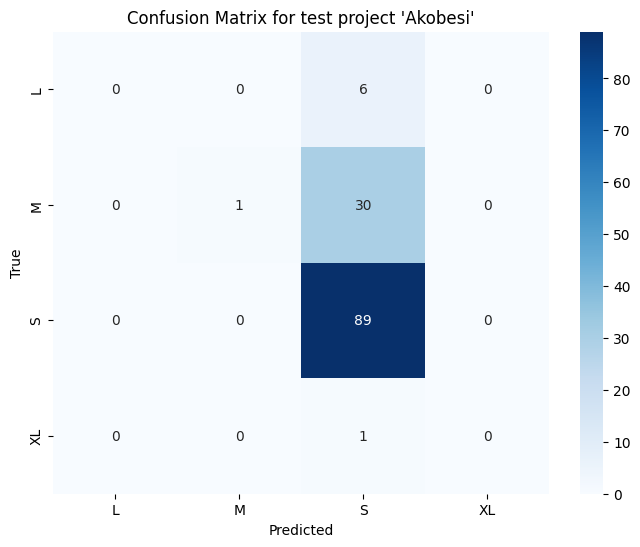

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         6
           M       0.18      0.06      0.10        31
           S       0.71      1.00      0.83        89
          XL       0.00      0.00      0.00         1

   micro avg       0.66      0.72      0.69       127
   macro avg       0.22      0.27      0.23       127
weighted avg       0.54      0.72      0.60       127
 samples avg       0.68      0.72      0.69       127

Precision: 0.5393814409562442     Recall: 0.7165354330708661      Accuracy: 0.6377952755905512      F1 Score: 0.6034338730914449

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


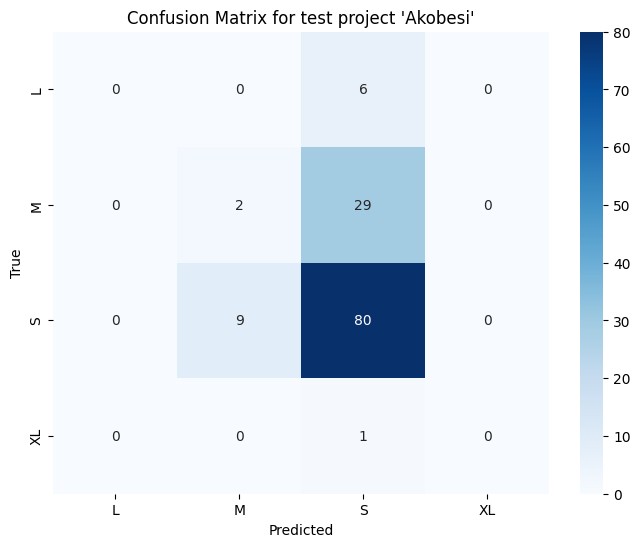

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         6
           M       0.25      0.03      0.06        31
           S       0.71      0.99      0.83        89
          XL       0.50      1.00      0.67         1

   micro avg       0.69      0.71      0.70       127
   macro avg       0.36      0.51      0.39       127
weighted avg       0.56      0.71      0.60       127
 samples avg       0.70      0.71      0.70       127

Precision: 0.5622936245872492     Recall: 0.7086614173228346      Accuracy: 0.6929133858267716      F1 Score: 0.598251979065997

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


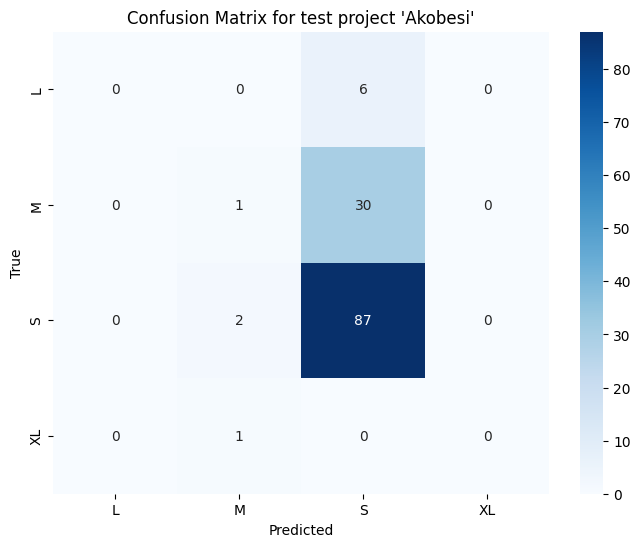

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         7
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         9
   macro avg       0.75      0.75      0.75         9
weighted avg       1.00      1.00      1.00         9
 samples avg       1.00      1.00      1.00         9

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

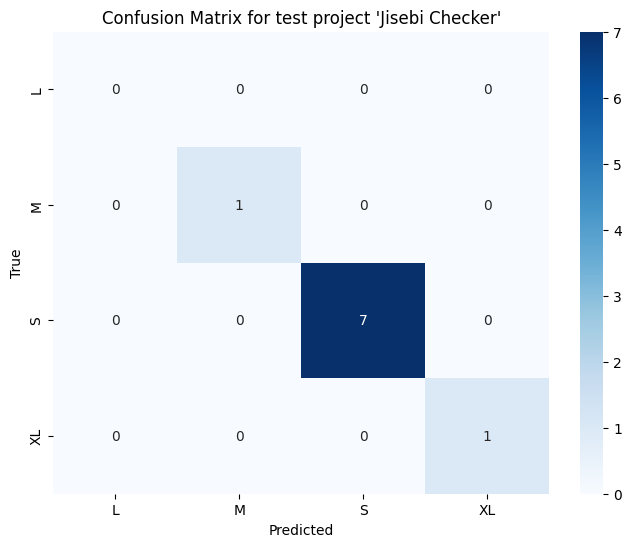

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         7
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         9
   macro avg       0.75      0.75      0.75         9
weighted avg       1.00      1.00      1.00         9
 samples avg       1.00      1.00      1.00         9

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

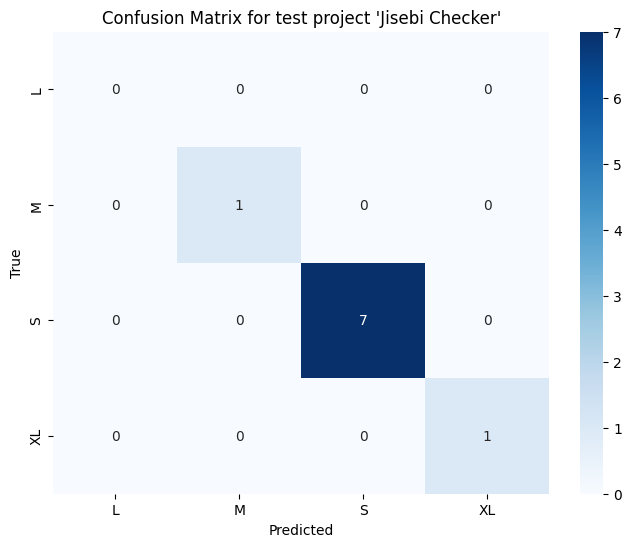

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.50      1.00      0.67         1
           S       1.00      0.86      0.92         7
          XL       0.00      0.00      0.00         1

   micro avg       0.88      0.78      0.82         9
   macro avg       0.38      0.46      0.40         9
weighted avg       0.83      0.78      0.79         9
 samples avg       0.78      0.78      0.78         9

Precision: 0.8333333333333334     Recall: 0.7777777777777778      Accuracy: 0.7777777777777778      F1 Score: 0.792022792022792

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

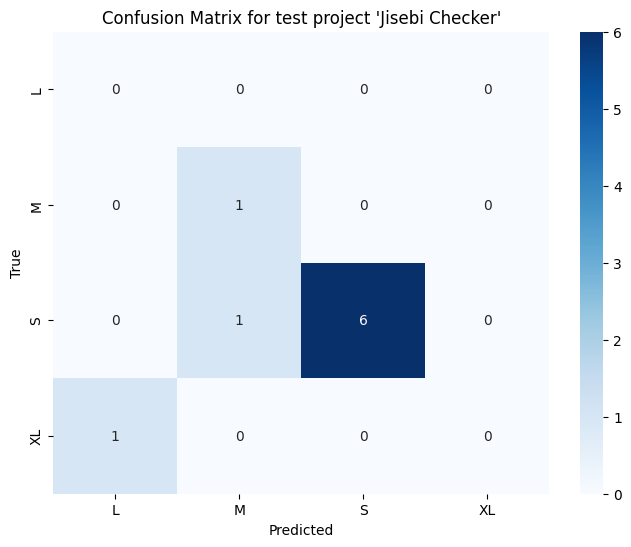

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         9
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00        11
   macro avg       0.75      0.75      0.75        11
weighted avg       1.00      1.00      1.00        11
 samples avg       1.00      1.00      1.00        11

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

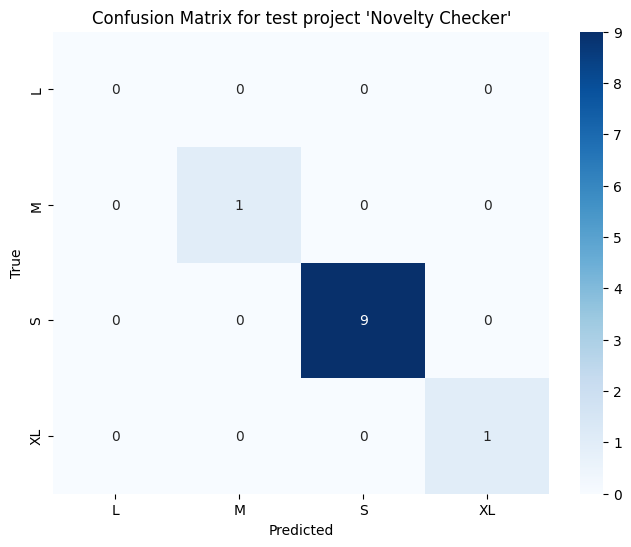

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.50      1.00      0.67         1
           S       1.00      1.00      1.00         9
          XL       1.00      1.00      1.00         1

   micro avg       0.92      1.00      0.96        11
   macro avg       0.62      0.75      0.67        11
weighted avg       0.95      1.00      0.97        11
 samples avg       0.95      1.00      0.97        11

Precision: 0.9545454545454546     Recall: 1.0      Accuracy: 0.9090909090909091      F1 Score: 0.9696969696969696

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

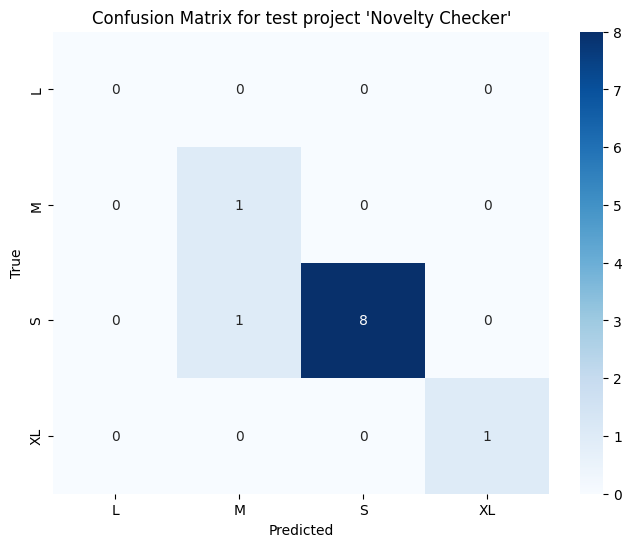

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      0.89      0.94         9
          XL       0.00      0.00      0.00         1

   micro avg       1.00      0.82      0.90        11
   macro avg       0.50      0.47      0.49        11
weighted avg       0.91      0.82      0.86        11
 samples avg       0.82      0.82      0.82        11

Precision: 0.9090909090909091     Recall: 0.8181818181818182      Accuracy: 0.8181818181818182      F1 Score: 0.8609625668449198

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

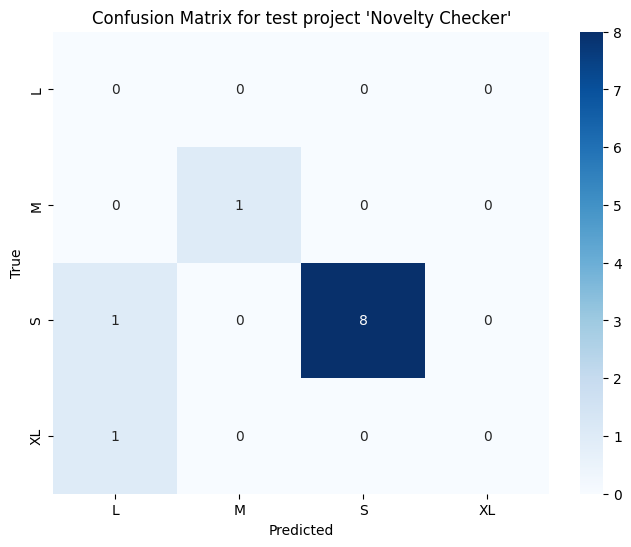

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         2
           M       0.50      1.00      0.67         2
           S       0.91      0.91      0.91        11
          XL       1.00      1.00      1.00         1

   micro avg       0.81      0.81      0.81        16
   macro avg       0.60      0.73      0.64        16
weighted avg       0.75      0.81      0.77        16
 samples avg       0.81      0.81      0.81        16

Precision: 0.75     Recall: 0.8125      Accuracy: 0.8125      F1 Score: 0.7708333333333334

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


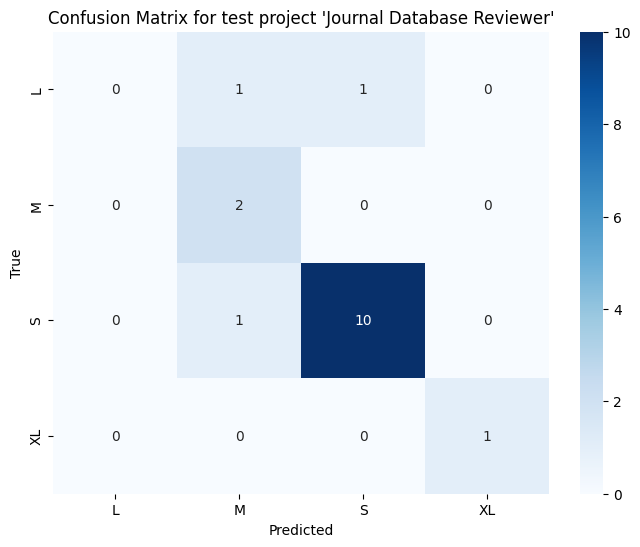

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         2
           M       0.50      1.00      0.67         2
           S       0.91      0.91      0.91        11
          XL       1.00      1.00      1.00         1

   micro avg       0.81      0.81      0.81        16
   macro avg       0.60      0.73      0.64        16
weighted avg       0.75      0.81      0.77        16
 samples avg       0.81      0.81      0.81        16

Precision: 0.75     Recall: 0.8125      Accuracy: 0.8125      F1 Score: 0.7708333333333334

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


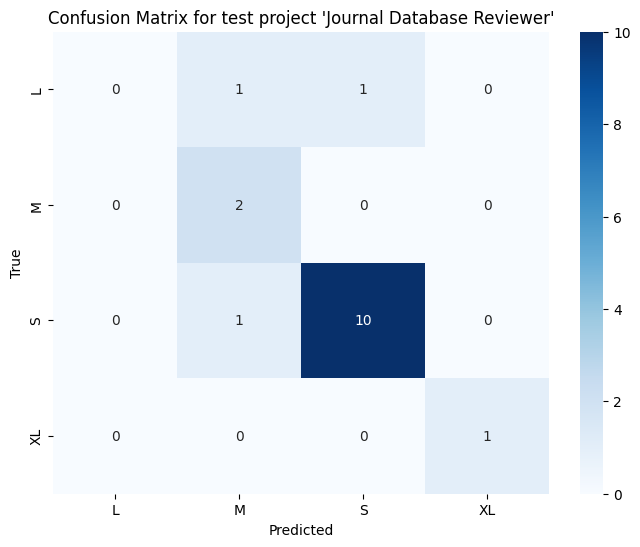

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         2
           M       0.40      1.00      0.57         2
           S       1.00      0.91      0.95        11
          XL       0.00      0.00      0.00         1

   micro avg       0.75      0.75      0.75        16
   macro avg       0.35      0.48      0.38        16
weighted avg       0.74      0.75      0.73        16
 samples avg       0.75      0.75      0.75        16

Precision: 0.7375     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.7261904761904762

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

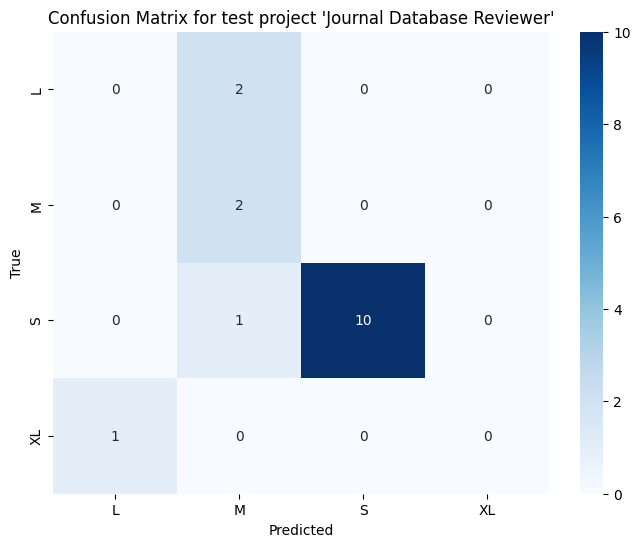

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.60      1.00      0.75         3
          XL       1.00      1.00      1.00         1

   micro avg       0.67      0.67      0.67         6
   macro avg       0.40      0.50      0.44         6
weighted avg       0.47      0.67      0.54         6
 samples avg       0.67      0.67      0.67         6

Precision: 0.4666666666666666     Recall: 0.6666666666666666      Accuracy: 0.6666666666666666      F1 Score: 0.5416666666666666

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

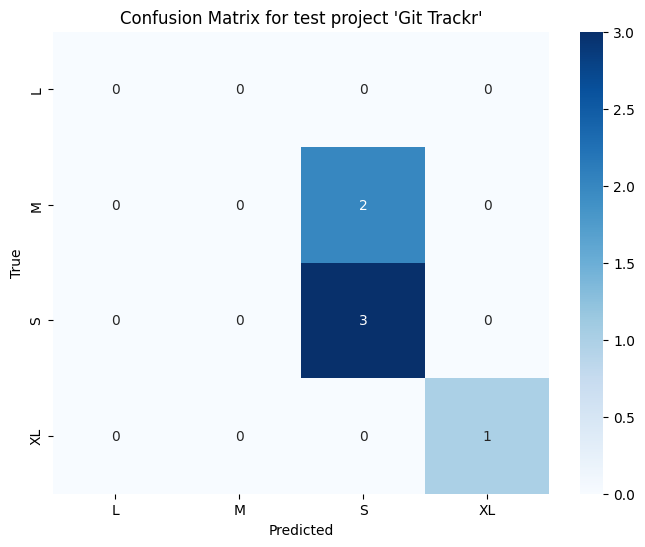

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.60      1.00      0.75         3
          XL       1.00      1.00      1.00         1

   micro avg       0.67      0.67      0.67         6
   macro avg       0.40      0.50      0.44         6
weighted avg       0.47      0.67      0.54         6
 samples avg       0.67      0.67      0.67         6

Precision: 0.4666666666666666     Recall: 0.6666666666666666      Accuracy: 0.6666666666666666      F1 Score: 0.5416666666666666

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

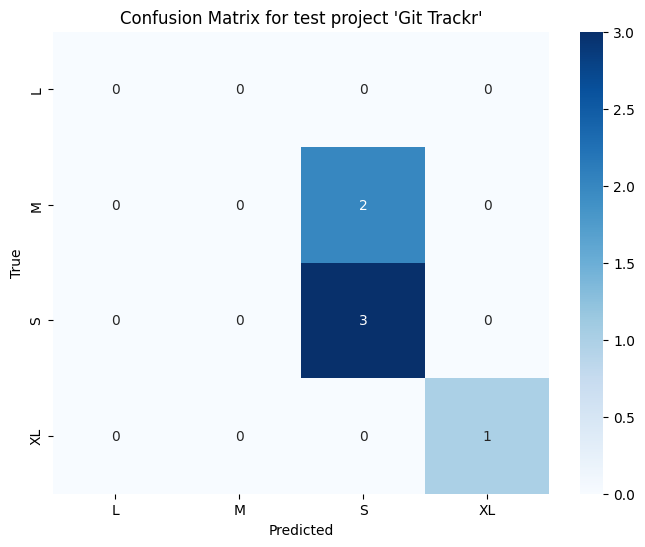

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.60      1.00      0.75         3
          XL       0.00      0.00      0.00         1

   micro avg       0.60      0.50      0.55         6
   macro avg       0.15      0.25      0.19         6
weighted avg       0.30      0.50      0.37         6
 samples avg       0.50      0.50      0.50         6

Precision: 0.3     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.37499999999999994

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

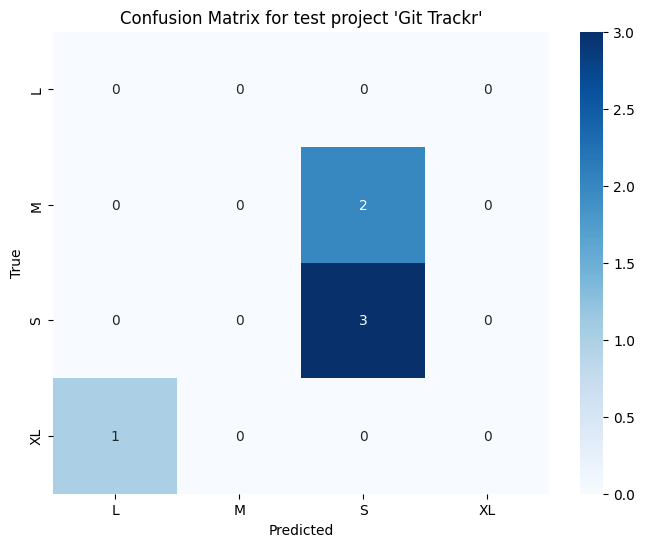

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      1.00      1.00         3
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         4
   macro avg       0.50      0.50      0.50         4
weighted avg       1.00      1.00      1.00         4
 samples avg       1.00      1.00      1.00         4

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

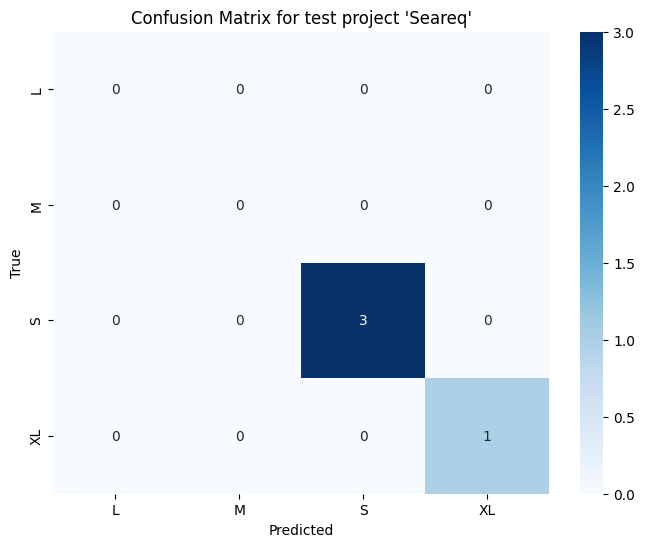

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      1.00      1.00         3
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         4
   macro avg       0.50      0.50      0.50         4
weighted avg       1.00      1.00      1.00         4
 samples avg       1.00      1.00      1.00         4

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

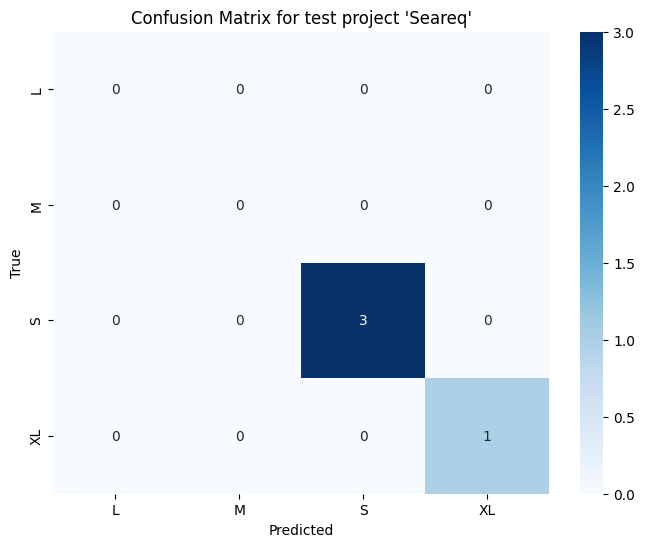

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80         3
          XL       0.00      0.00      0.00         1

   micro avg       0.67      0.50      0.57         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.75      0.50      0.60         4
 samples avg       0.50      0.50      0.50         4



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.75     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.6000000000000001

Confusion matrix for test project 'Seareq':


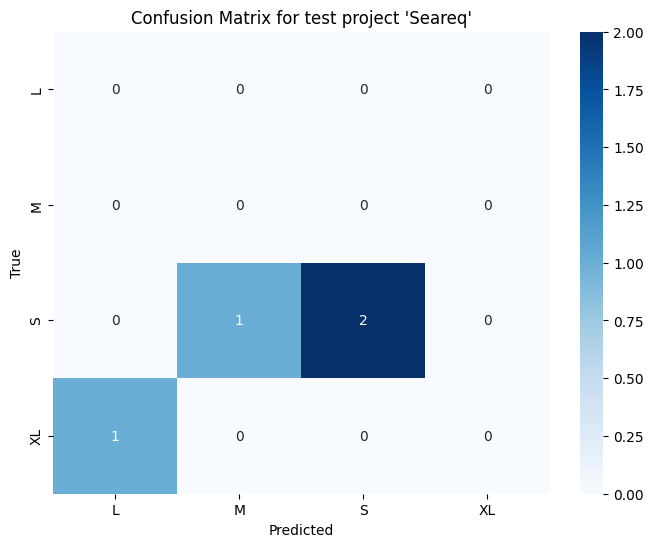

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.17      0.29         6
           S       0.71      1.00      0.83        12
          XL       0.00      0.00      0.00         0

   micro avg       0.72      0.72      0.72        18
   macro avg       0.43      0.29      0.28        18
weighted avg       0.80      0.72      0.65        18
 samples avg       0.72      0.72      0.72        18



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Precision: 0.803921568627451     Recall: 0.7222222222222222      Accuracy: 0.7222222222222222      F1 Score: 0.6469622331691297

Confusion matrix for test project 'Sales Monitoring on Multimarket':


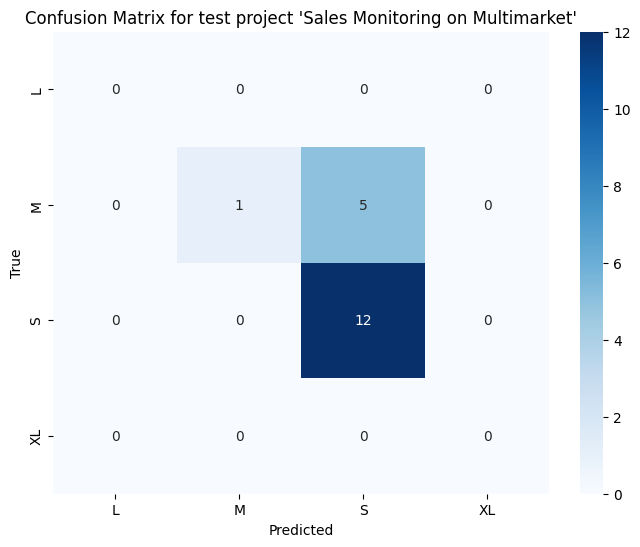

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.17      0.29         6
           S       0.71      1.00      0.83        12
          XL       0.00      0.00      0.00         0

   micro avg       0.72      0.72      0.72        18
   macro avg       0.43      0.29      0.28        18
weighted avg       0.80      0.72      0.65        18
 samples avg       0.72      0.72      0.72        18

Precision: 0.803921568627451     Recall: 0.7222222222222222      Accuracy: 0.7222222222222222      F1 Score: 0.6469622331691297

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

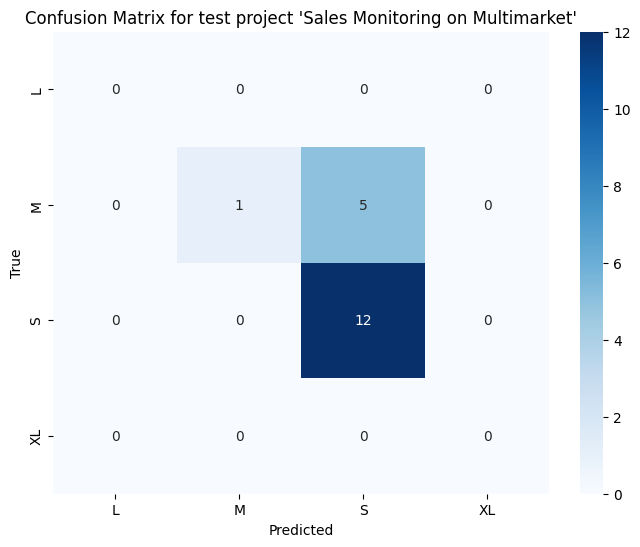

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.17      0.29         6
           S       0.75      1.00      0.86        12
          XL       0.00      0.00      0.00         0

   micro avg       0.76      0.72      0.74        18
   macro avg       0.44      0.29      0.29        18
weighted avg       0.83      0.72      0.67        18
 samples avg       0.72      0.72      0.72        18



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.8333333333333334     Recall: 0.7222222222222222      Accuracy: 0.7222222222222222      F1 Score: 0.6666666666666665

Confusion matrix for test project 'Sales Monitoring on Multimarket':


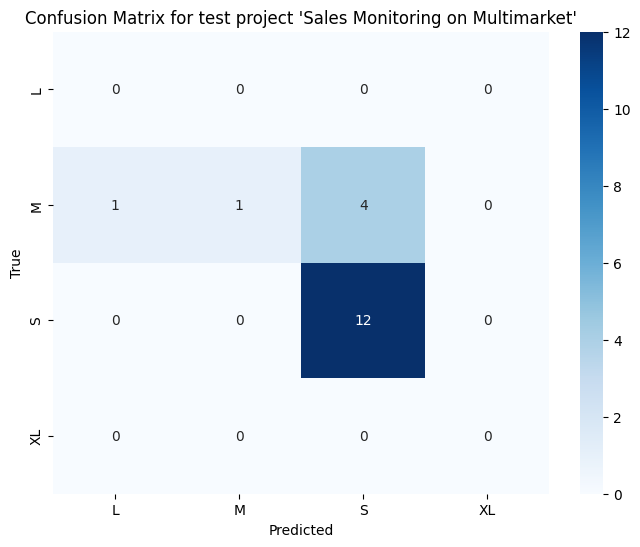

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.50      0.67         2
           S       0.83      1.00      0.91         5
          XL       1.00      1.00      1.00         1

   micro avg       0.88      0.88      0.88         8
   macro avg       0.71      0.62      0.64         8
weighted avg       0.90      0.88      0.86         8
 samples avg       0.88      0.88      0.88         8

Precision: 0.8958333333333334     Recall: 0.875      Accuracy: 0.875      F1 Score: 0.8598484848484848

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

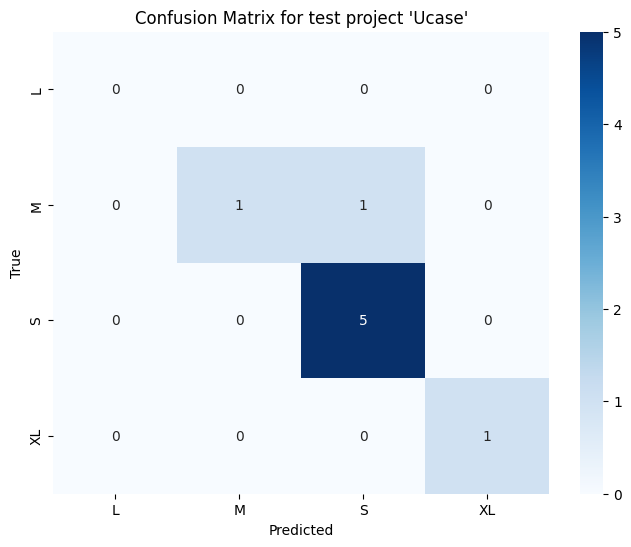

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.50      0.67         2
           S       0.83      1.00      0.91         5
          XL       1.00      1.00      1.00         1

   micro avg       0.88      0.88      0.88         8
   macro avg       0.71      0.62      0.64         8
weighted avg       0.90      0.88      0.86         8
 samples avg       0.88      0.88      0.88         8

Precision: 0.8958333333333334     Recall: 0.875      Accuracy: 0.875      F1 Score: 0.8598484848484848

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

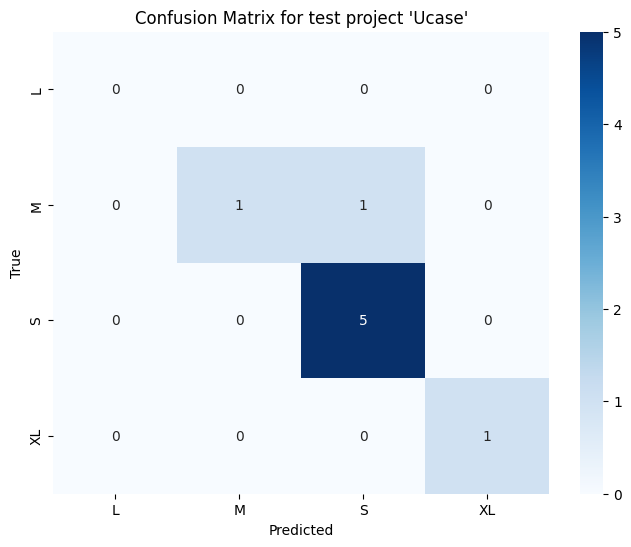

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         2
           S       1.00      1.00      1.00         5
          XL       0.00      0.00      0.00         1

   micro avg       1.00      0.88      0.93         8
   macro avg       0.50      0.50      0.50         8
weighted avg       0.88      0.88      0.88         8
 samples avg       0.88      0.88      0.88         8

Precision: 0.875     Recall: 0.875      Accuracy: 0.875      F1 Score: 0.875

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

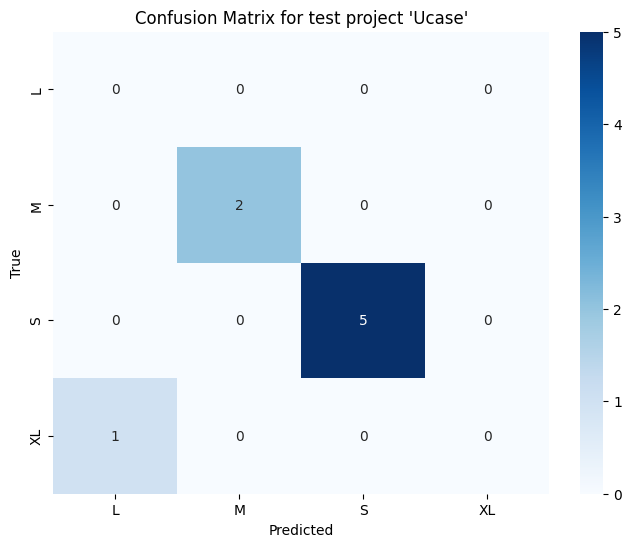

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.33      0.50         3
           S       0.80      1.00      0.89         8
          XL       1.00      1.00      1.00         2

   micro avg       0.85      0.85      0.85        13
   macro avg       0.70      0.58      0.60        13
weighted avg       0.88      0.85      0.82        13
 samples avg       0.85      0.85      0.85        13

Precision: 0.8769230769230769     Recall: 0.8461538461538461      Accuracy: 0.8461538461538461      F1 Score: 0.8162393162393162

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

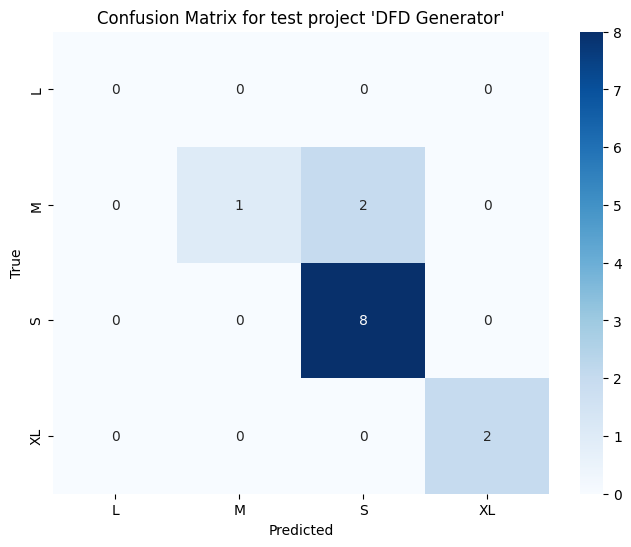

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.67      0.80         3
           S       0.80      1.00      0.89         8
          XL       1.00      1.00      1.00         2

   micro avg       0.86      0.92      0.89        13
   macro avg       0.70      0.67      0.67        13
weighted avg       0.88      0.92      0.89        13
 samples avg       0.88      0.92      0.90        13

Precision: 0.8769230769230769     Recall: 0.9230769230769231      Accuracy: 0.8461538461538461      F1 Score: 0.8854700854700857

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

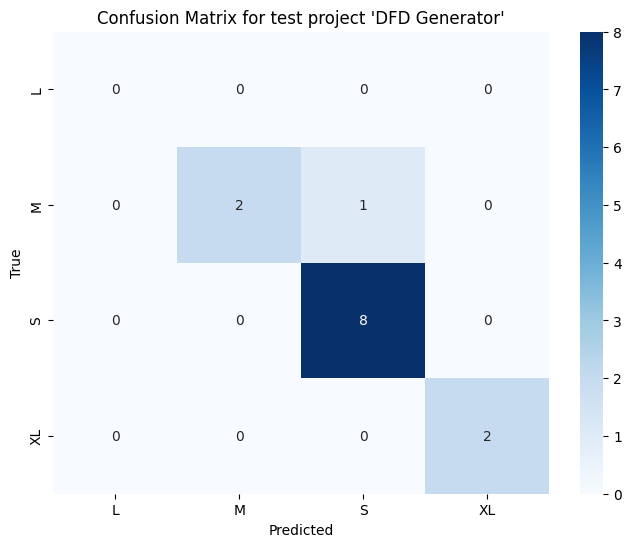

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.33      0.50         3
           S       1.00      1.00      1.00         8
          XL       0.00      0.00      0.00         2

   micro avg       1.00      0.69      0.82        13
   macro avg       0.50      0.33      0.38        13
weighted avg       0.85      0.69      0.73        13
 samples avg       0.69      0.69      0.69        13

Precision: 0.8461538461538461     Recall: 0.6923076923076923      Accuracy: 0.6923076923076923      F1 Score: 0.7307692307692307

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

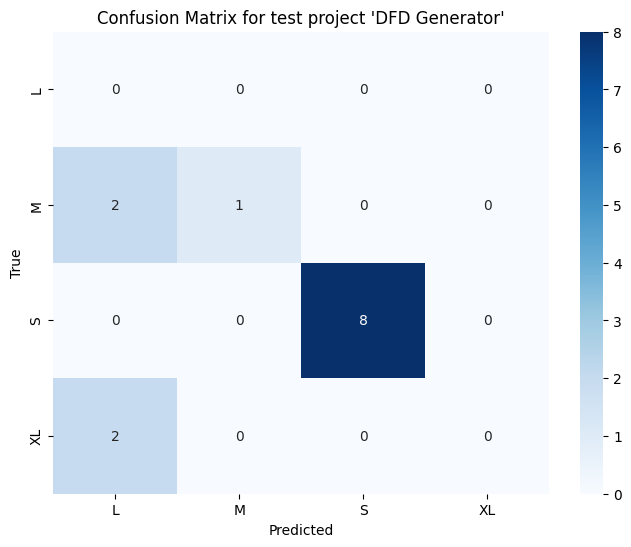

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         8
          XL       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        11
   macro avg       0.75      0.75      0.75        11
weighted avg       1.00      1.00      1.00        11
 samples avg       1.00      1.00      1.00        11

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

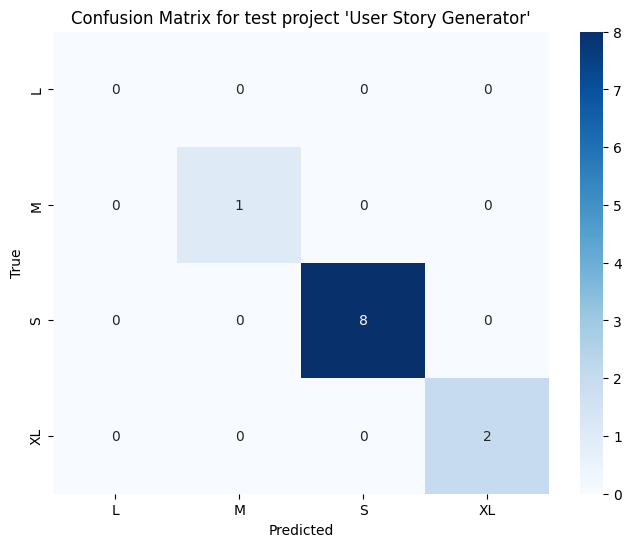

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         8
          XL       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        11
   macro avg       0.75      0.75      0.75        11
weighted avg       1.00      1.00      1.00        11
 samples avg       1.00      1.00      1.00        11

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

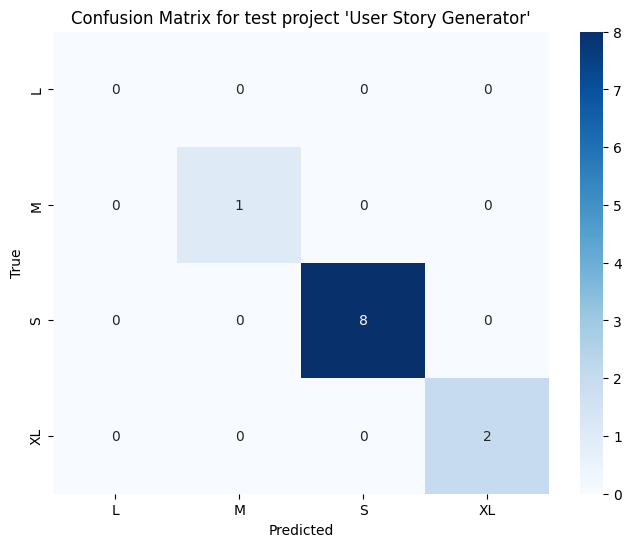

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.89      1.00      0.94         8
          XL       0.00      0.00      0.00         2

   micro avg       0.90      0.82      0.86        11
   macro avg       0.47      0.50      0.49        11
weighted avg       0.74      0.82      0.78        11
 samples avg       0.82      0.82      0.82        11

Precision: 0.7373737373737373     Recall: 0.8181818181818182      Accuracy: 0.8181818181818182      F1 Score: 0.7754010695187166

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

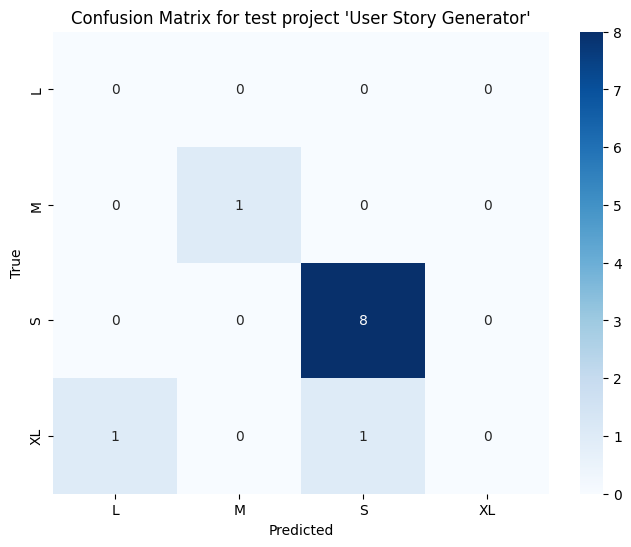

In [33]:
# Model TF-IDF User Story
accuracy_list_Adaboost_2 = []
accuracy_list_DecisionTree_2 = []
accuracy_list_MultinomialNB_2 = []
precision_list_Adaboost_2 = []
precision_list_DecisionTree_2 = []
precision_list_MultinomialNB_2 = []
recall_list_Adaboost_2 = []
recall_list_DecisionTree_2 = []
recall_list_MultinomialNB_2 = []
f1_score_list_Adaboost_2 = []
f1_score_list_DecisionTree_2 = []
f1_score_list_MultinomialNB_2 = []
mean_accuracy_2 = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())

# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    test_indices = test_project_data.index
    X_test = tfidf_df_user_story.loc[test_indices]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    train_indices = train_projects_data.index
    X_train = tfidf_df_user_story.loc[train_indices]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost_2.append(accuracy)
    precision_list_Adaboost_2.append(precision)
    recall_list_Adaboost_2.append(recall)
    f1_score_list_Adaboost_2.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree_2.append(accuracy)
    precision_list_DecisionTree_2.append(precision)
    recall_list_DecisionTree_2.append(recall)
    f1_score_list_DecisionTree_2.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB_2.append(accuracy)
    precision_list_MultinomialNB_2.append(precision)
    recall_list_MultinomialNB_2.append(recall)
    f1_score_list_MultinomialNB_2.append(f1)

In [34]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost_2': precision_list_Adaboost_2,
    'Recall_Adaboost_2': recall_list_Adaboost_2,
    'Accuracy_Adaboost_2': accuracy_list_Adaboost_2,
    'F1_Score_Adaboost_2': f1_score_list_Adaboost_2,
    'Precision_DecisionTree_2': precision_list_DecisionTree_2,
    'Recall_DecisionTree_2': recall_list_DecisionTree_2,
    'Accuracy_DecisionTree_2': accuracy_list_DecisionTree_2,
    'F1_Score_DecisionTree_2': f1_score_list_DecisionTree_2,
    'Precision_MultinomialNB_2': precision_list_MultinomialNB_2,
    'Recall_MultinomialNB_2': recall_list_MultinomialNB_2,
    'Accuracy_MultinomialNB_2': accuracy_list_MultinomialNB_2,
    'F1_Score_MultinomialNB_2': f1_score_list_MultinomialNB_2,
}

# Buat DataFrame
df_result_2 = pd.DataFrame(data)

# Tampilkan DataFrame
df_result_2


,Project,Precision_Adaboost_2,Recall_Adaboost_2,Accuracy_Adaboost_2,F1_Score_Adaboost_2,Precision_DecisionTree_2,Recall_DecisionTree_2,Accuracy_DecisionTree_2,F1_Score_DecisionTree_2,Precision_MultinomialNB_2,Recall_MultinomialNB_2,Accuracy_MultinomialNB_2,F1_Score_MultinomialNB_2
0,Akobesi,0.739095,0.708661,0.708661,0.595443,0.539381,0.716535,0.637795,0.603434,0.562294,0.708661,0.692913,0.598252
1,Jisebi Checker,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,0.777778,0.777778,0.792023
2,Novelty Checker,1.000000,1.000000,1.000000,1.000000,0.954545,1.000000,0.909091,0.969697,0.909091,0.818182,0.818182,0.860963
3,Journal Database Reviewer,0.750000,0.812500,0.812500,0.770833,0.750000,0.812500,0.812500,0.770833,0.737500,0.750000,0.750000,0.726190
4,Git Trackr,0.466667,0.666667,0.666667,0.541667,0.466667,0.666667,0.666667,0.541667,0.300000,0.500000,0.500000,0.375000
5,Seareq,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,0.500000,0.500000,0.600000
6,Sales Monitoring on Multimarket,0.803922,0.722222,0.722222,0.646962,0.803922,0.722222,0.722222,0.646962,0.833333,0.722222,0.722222,0.666667
7,Ucase,0.895833,0.875000,0.875000,0.859848,0.895833,0.875000,0.875000,0.859848,0.875000,0.875000,0.875000,0.875000
8,DFD Generator,0.876923,0.846154,0.846154,0.816239,0.876923,0.923077,0.846154,0.885470,0.846154,0.692308,0.692308,0.730769
9,User Story Generator,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.737374,0.818182,0.818182,0.775401


In [35]:
# Mean Accuracy
mean_accuracy_2.append(np.mean(accuracy_list_Adaboost_2))
mean_accuracy_2.append(np.mean(accuracy_list_DecisionTree_2))
mean_accuracy_2.append(np.mean(accuracy_list_MultinomialNB_2))

print("Mean Accuracy")
print(mean_accuracy_2)

Mean Accuracy
[0.8631204152365569, 0.8469428919724195, 0.7146584714498101]


====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         6
           M       0.50      0.03      0.06        31
           S       0.69      0.89      0.77        89
          XL       0.00      0.00      0.00         1

   micro avg       0.68      0.63      0.66       127
   macro avg       0.30      0.23      0.21       127
weighted avg       0.60      0.63      0.56       127
 samples avg       0.63      0.63      0.63       127

Precision: 0.6034577199589183     Recall: 0.6299212598425197      Accuracy: 0.6220472440944882      F1 Score: 0.5575603183291928

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

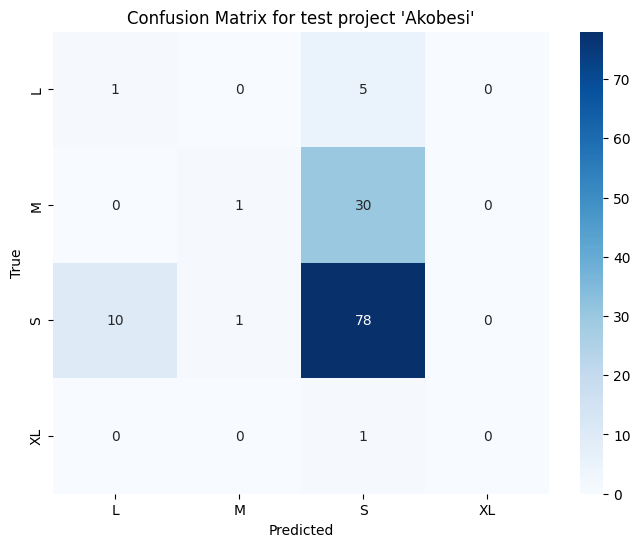

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         6
           M       0.08      0.03      0.05        31
           S       0.69      0.89      0.77        89
          XL       0.00      0.00      0.00         1

   micro avg       0.62      0.63      0.63       127
   macro avg       0.19      0.23      0.20       127
weighted avg       0.50      0.63      0.55       127
 samples avg       0.63      0.63      0.63       127

Precision: 0.5001869749558898     Recall: 0.6299212598425197      Accuracy: 0.6220472440944882      F1 Score: 0.5538619169929963

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


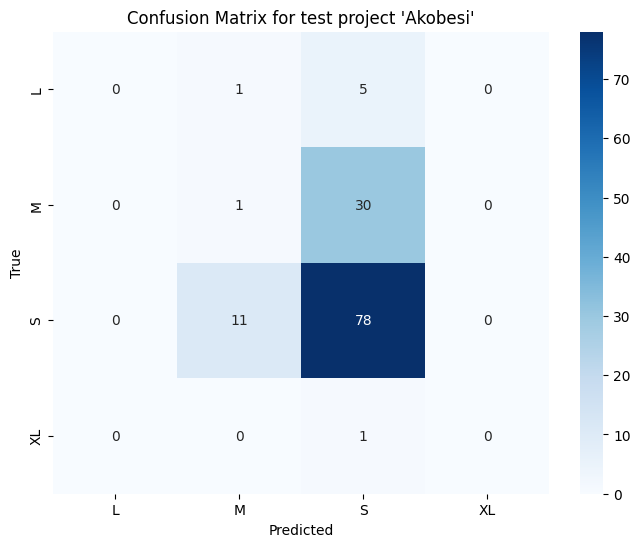

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         6
           M       1.00      0.03      0.06        31
           S       0.71      1.00      0.83        89
          XL       0.00      0.00      0.00         1

   micro avg       0.71      0.71      0.71       127
   macro avg       0.43      0.26      0.22       127
weighted avg       0.74      0.71      0.60       127
 samples avg       0.71      0.71      0.71       127

Precision: 0.7390951131108612     Recall: 0.7086614173228346      Accuracy: 0.7086614173228346      F1 Score: 0.5954426844900201

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


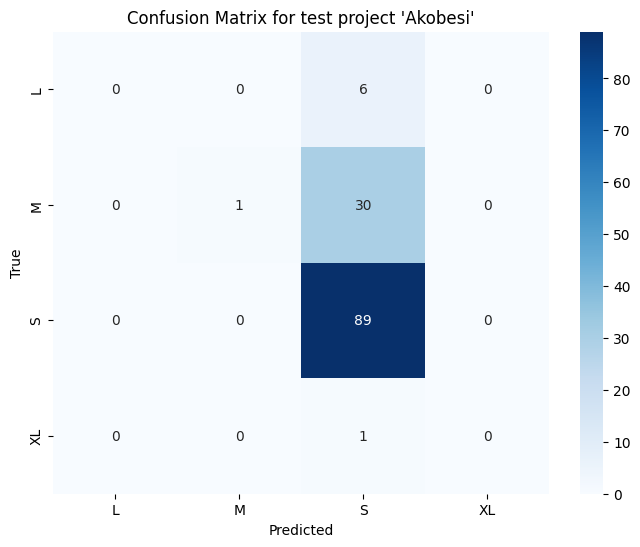

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         7
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         9
   macro avg       0.75      0.75      0.75         9
weighted avg       1.00      1.00      1.00         9
 samples avg       1.00      1.00      1.00         9

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

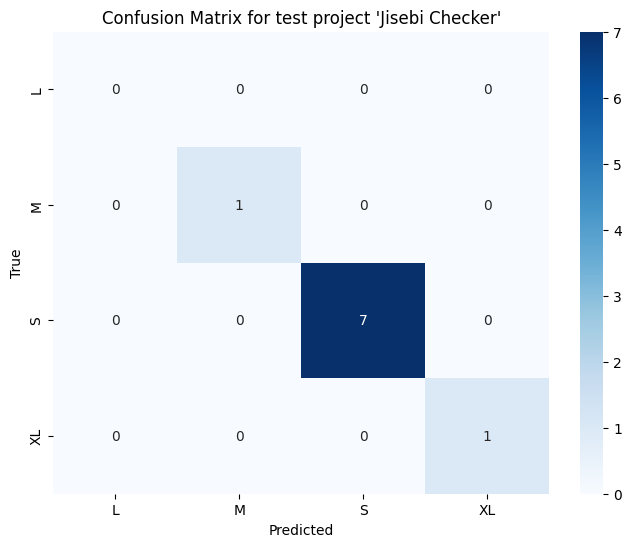

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         7
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         9
   macro avg       0.75      0.75      0.75         9
weighted avg       1.00      1.00      1.00         9
 samples avg       1.00      1.00      1.00         9

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

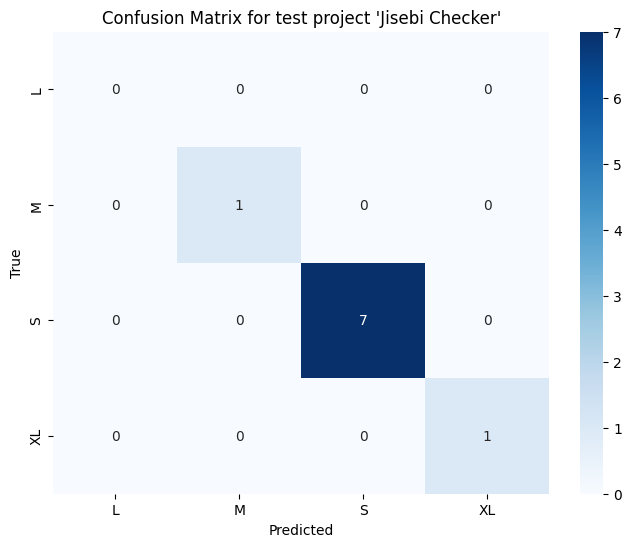

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         7
          XL       0.00      0.00      0.00         1

   micro avg       1.00      0.89      0.94         9
   macro avg       0.50      0.50      0.50         9
weighted avg       0.89      0.89      0.89         9
 samples avg       0.89      0.89      0.89         9

Precision: 0.8888888888888888     Recall: 0.8888888888888888      Accuracy: 0.8888888888888888      F1 Score: 0.8888888888888888

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

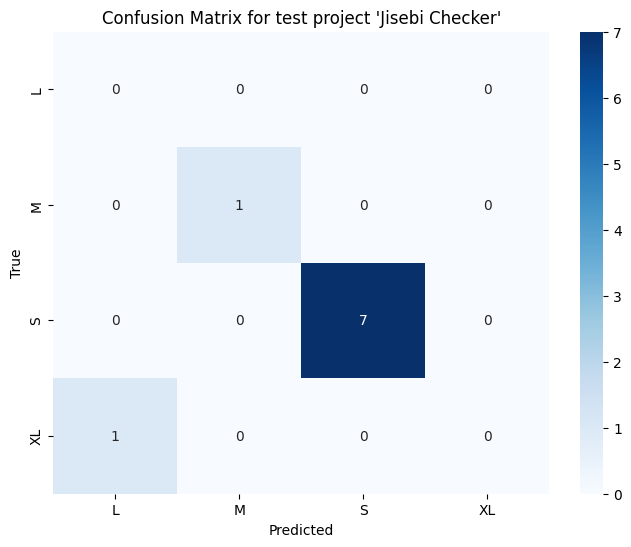

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         9
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00        11
   macro avg       0.75      0.75      0.75        11
weighted avg       1.00      1.00      1.00        11
 samples avg       1.00      1.00      1.00        11

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

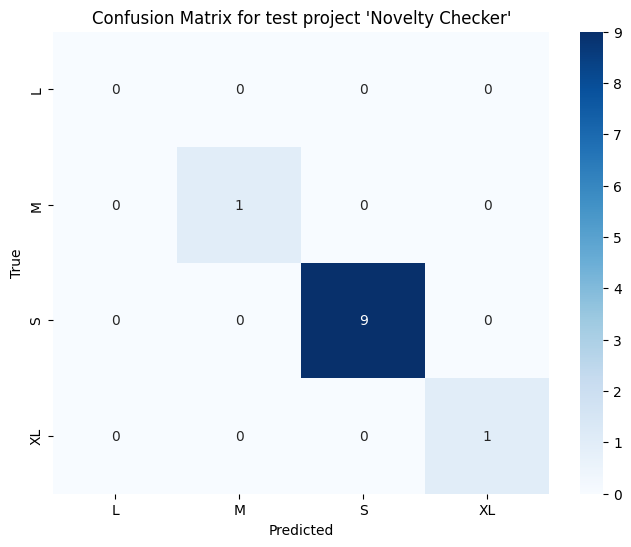

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         9
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00        11
   macro avg       0.75      0.75      0.75        11
weighted avg       1.00      1.00      1.00        11
 samples avg       1.00      1.00      1.00        11



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Novelty Checker':


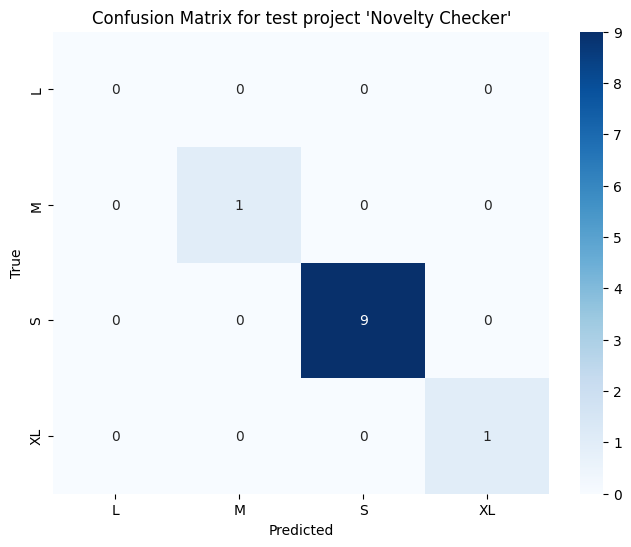

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.90      1.00      0.95         9
          XL       0.00      0.00      0.00         1

   micro avg       0.91      0.91      0.91        11
   macro avg       0.47      0.50      0.49        11
weighted avg       0.83      0.91      0.87        11
 samples avg       0.91      0.91      0.91        11

Precision: 0.8272727272727273     Recall: 0.9090909090909091      Accuracy: 0.9090909090909091      F1 Score: 0.8660287081339714

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

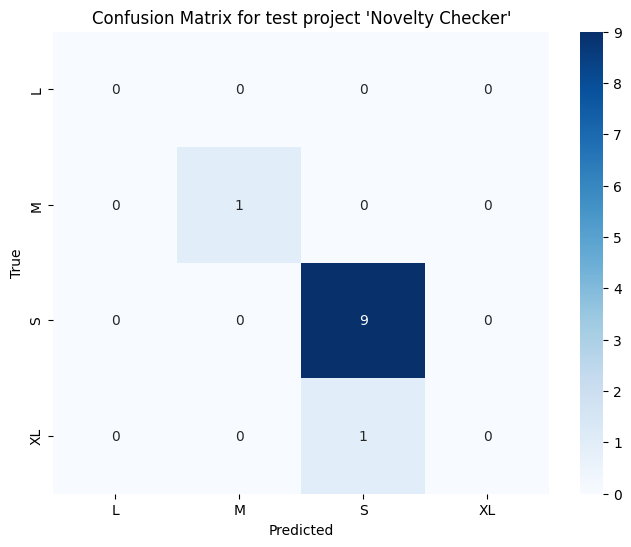

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         2
           M       0.50      1.00      0.67         2
           S       0.92      1.00      0.96        11
          XL       1.00      1.00      1.00         1

   micro avg       0.82      0.88      0.85        16
   macro avg       0.60      0.75      0.66        16
weighted avg       0.76      0.88      0.80        16
 samples avg       0.84      0.88      0.85        16

Precision: 0.7552083333333333     Recall: 0.875      Accuracy: 0.8125      F1 Score: 0.8034420289855073

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


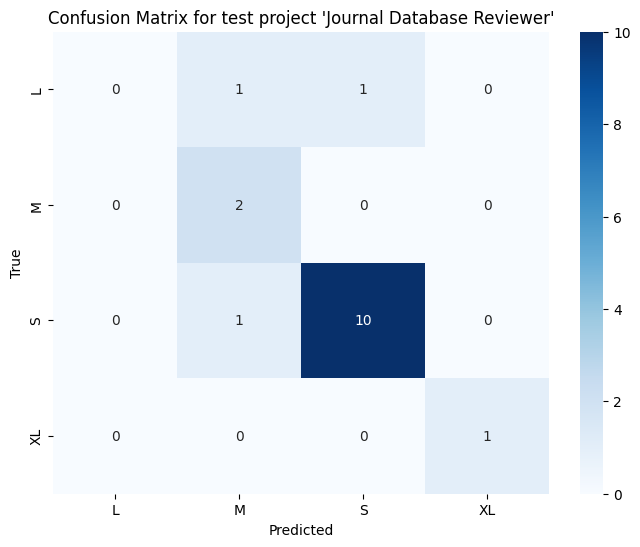

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         2
           M       0.50      0.50      0.50         2
           S       1.00      0.73      0.84        11
          XL       1.00      1.00      1.00         1

   micro avg       0.91      0.62      0.74        16
   macro avg       0.62      0.56      0.59        16
weighted avg       0.81      0.62      0.70        16
 samples avg       0.62      0.62      0.62        16



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.8125     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.7039473684210527

Confusion matrix for test project 'Journal Database Reviewer':


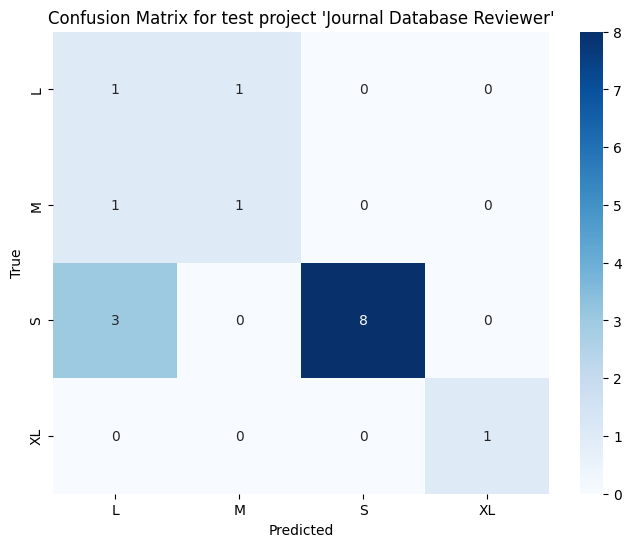

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         2
           M       0.50      0.50      0.50         2
           S       0.79      1.00      0.88        11
          XL       0.00      0.00      0.00         1

   micro avg       0.75      0.75      0.75        16
   macro avg       0.32      0.38      0.34        16
weighted avg       0.60      0.75      0.67        16
 samples avg       0.75      0.75      0.75        16

Precision: 0.6026785714285714     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.6675

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


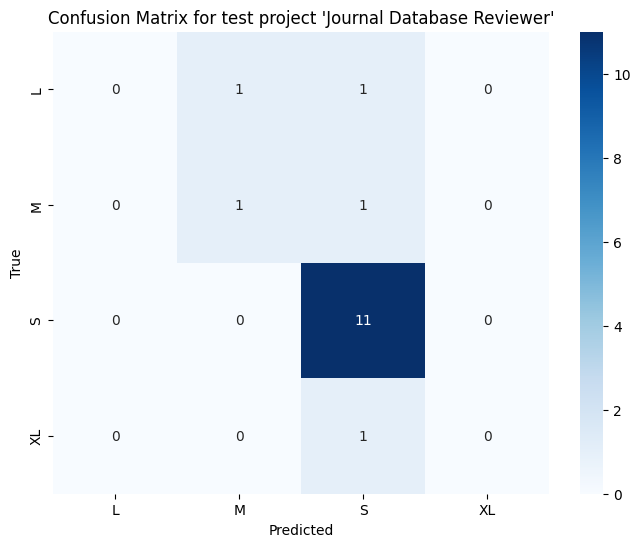

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.60      1.00      0.75         3
          XL       1.00      1.00      1.00         1

   micro avg       0.67      0.67      0.67         6
   macro avg       0.40      0.50      0.44         6
weighted avg       0.47      0.67      0.54         6
 samples avg       0.67      0.67      0.67         6

Precision: 0.4666666666666666     Recall: 0.6666666666666666      Accuracy: 0.6666666666666666      F1 Score: 0.5416666666666666

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

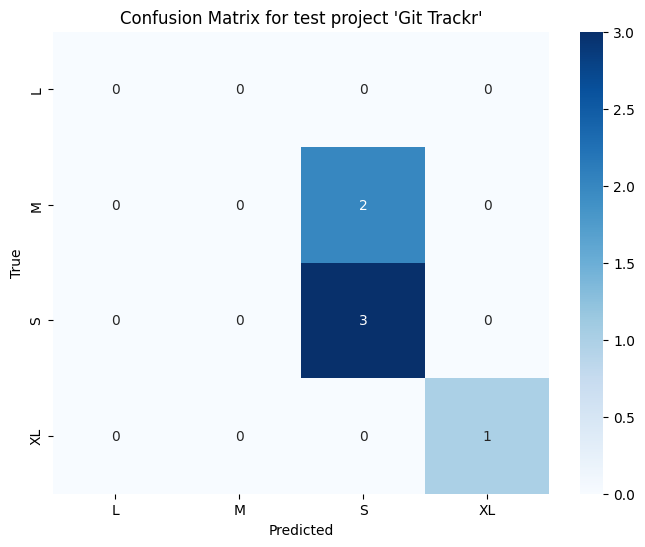

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.50      1.00      0.67         3
          XL       1.00      1.00      1.00         1

   micro avg       0.57      0.67      0.62         6
   macro avg       0.38      0.50      0.42         6
weighted avg       0.42      0.67      0.50         6
 samples avg       0.58      0.67      0.61         6



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Precision: 0.4166666666666667     Recall: 0.6666666666666666      Accuracy: 0.5      F1 Score: 0.5

Confusion matrix for test project 'Git Trackr':


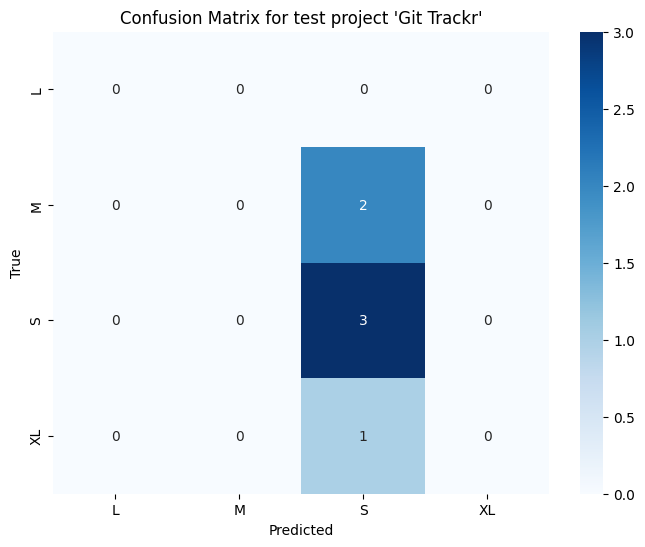

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.60      1.00      0.75         3
          XL       0.00      0.00      0.00         1

   micro avg       0.60      0.50      0.55         6
   macro avg       0.15      0.25      0.19         6
weighted avg       0.30      0.50      0.37         6
 samples avg       0.50      0.50      0.50         6

Precision: 0.3     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.37499999999999994

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

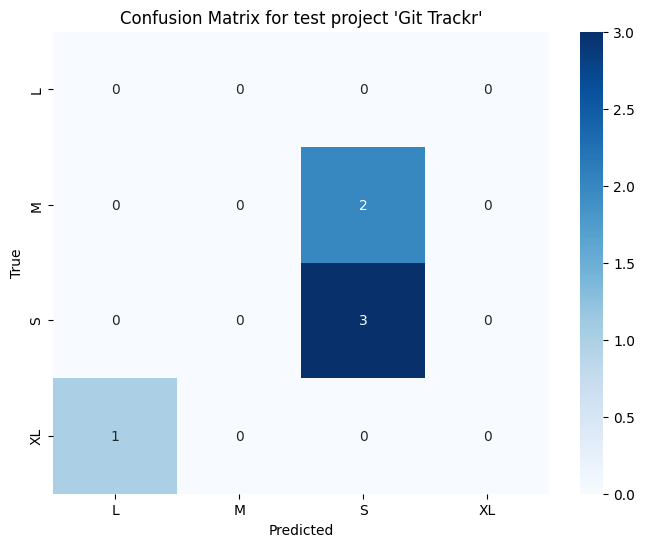

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      1.00      1.00         3
          XL       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         4
   macro avg       0.50      0.50      0.50         4
weighted avg       1.00      1.00      1.00         4
 samples avg       1.00      1.00      1.00         4

Precision: 1.0     Recall: 1.0      Accuracy: 1.0      F1 Score: 1.0

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

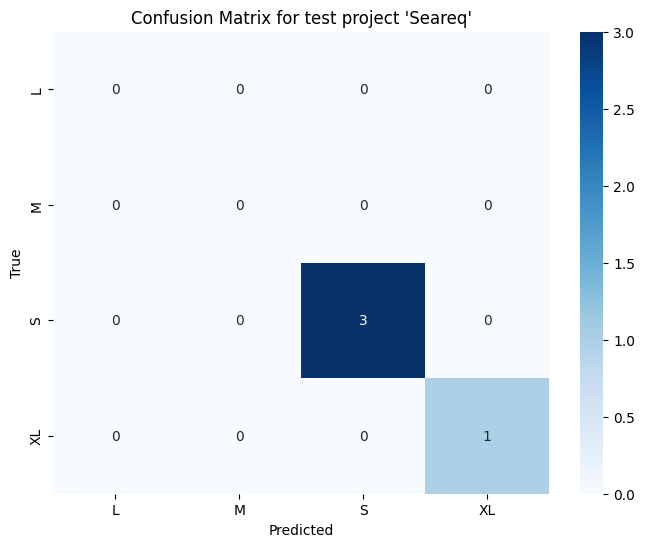

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.33      0.50         3
          XL       1.00      1.00      1.00         1

   micro avg       1.00      0.50      0.67         4
   macro avg       0.50      0.33      0.38         4
weighted avg       1.00      0.50      0.62         4
 samples avg       0.50      0.50      0.50         4



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 1.0     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.625

Confusion matrix for test project 'Seareq':


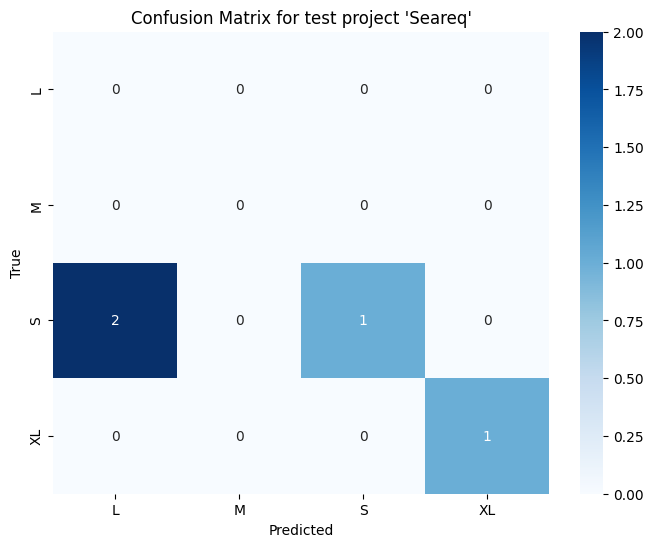

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80         3
          XL       0.00      0.00      0.00         1

   micro avg       1.00      0.50      0.67         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.75      0.50      0.60         4
 samples avg       0.50      0.50      0.50         4



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.75     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.6000000000000001

Confusion matrix for test project 'Seareq':


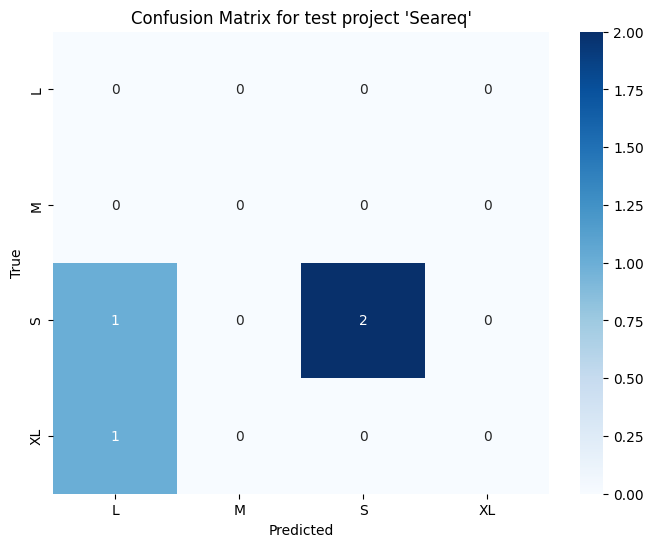

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.17      0.29         6
           S       0.83      0.83      0.83        12
          XL       0.00      0.00      0.00         0

   micro avg       0.85      0.61      0.71        18
   macro avg       0.46      0.25      0.28        18
weighted avg       0.89      0.61      0.65        18
 samples avg       0.61      0.61      0.61        18

Precision: 0.8888888888888888     Recall: 0.6111111111111112      Accuracy: 0.6111111111111112      F1 Score: 0.6507936507936507

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

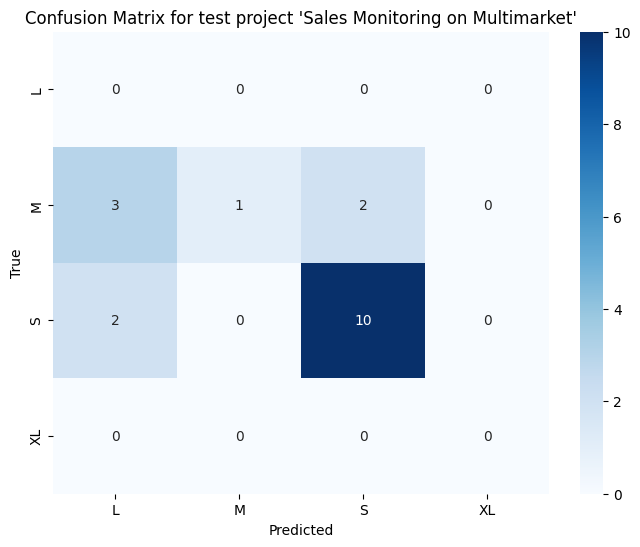

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.17      0.29         6
           S       0.69      0.92      0.79        12
          XL       0.00      0.00      0.00         0

   micro avg       0.71      0.67      0.69        18
   macro avg       0.42      0.27      0.27        18
weighted avg       0.79      0.67      0.62        18
 samples avg       0.67      0.67      0.67        18

Precision: 0.7916666666666666     Recall: 0.6666666666666666      Accuracy: 0.6666666666666666      F1 Score: 0.6190476190476191

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

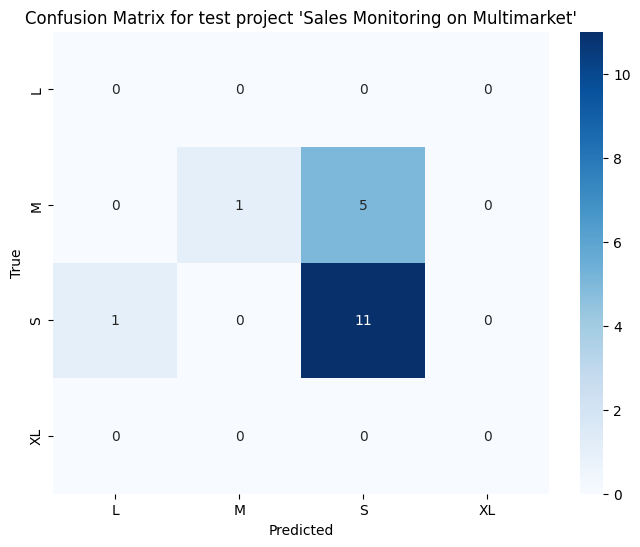

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.17      0.29         6
           S       0.75      1.00      0.86        12
          XL       0.00      0.00      0.00         0

   micro avg       0.76      0.72      0.74        18
   macro avg       0.44      0.29      0.29        18
weighted avg       0.83      0.72      0.67        18
 samples avg       0.72      0.72      0.72        18

Precision: 0.8333333333333334     Recall: 0.7222222222222222      Accuracy: 0.7222222222222222      F1 Score: 0.6666666666666665

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

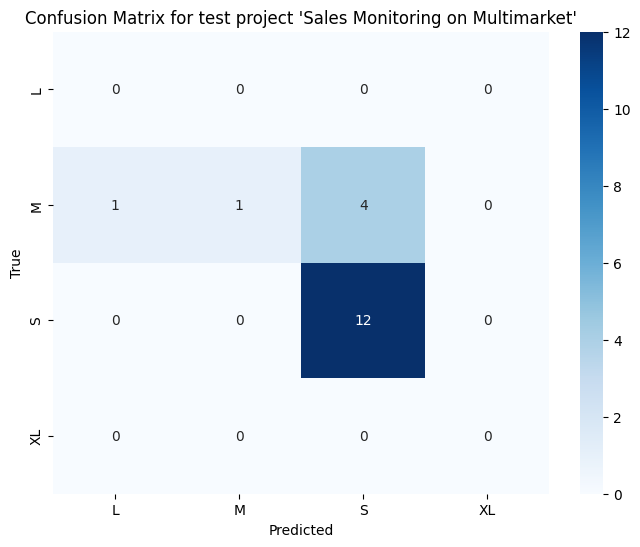

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.50      0.67         2
           S       0.83      1.00      0.91         5
          XL       1.00      1.00      1.00         1

   micro avg       0.88      0.88      0.88         8
   macro avg       0.71      0.62      0.64         8
weighted avg       0.90      0.88      0.86         8
 samples avg       0.88      0.88      0.88         8

Precision: 0.8958333333333334     Recall: 0.875      Accuracy: 0.875      F1 Score: 0.8598484848484848

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

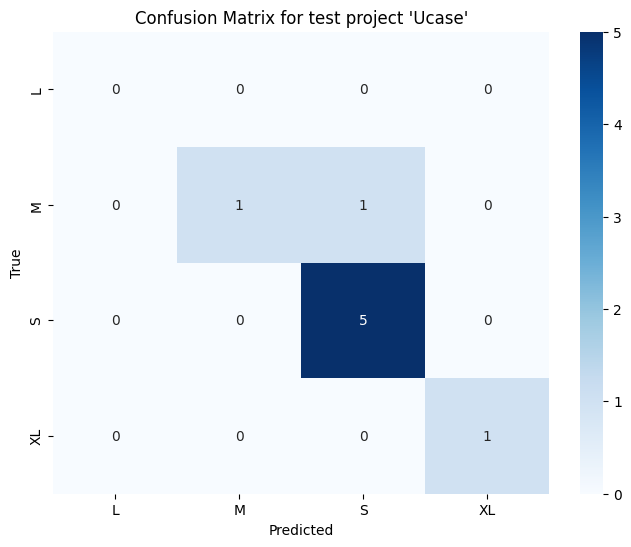

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.50      0.67         2
           S       0.83      1.00      0.91         5
          XL       1.00      1.00      1.00         1

   micro avg       0.88      0.88      0.88         8
   macro avg       0.71      0.62      0.64         8
weighted avg       0.90      0.88      0.86         8
 samples avg       0.88      0.88      0.88         8

Precision: 0.8958333333333334     Recall: 0.875      Accuracy: 0.875      F1 Score: 0.8598484848484848

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

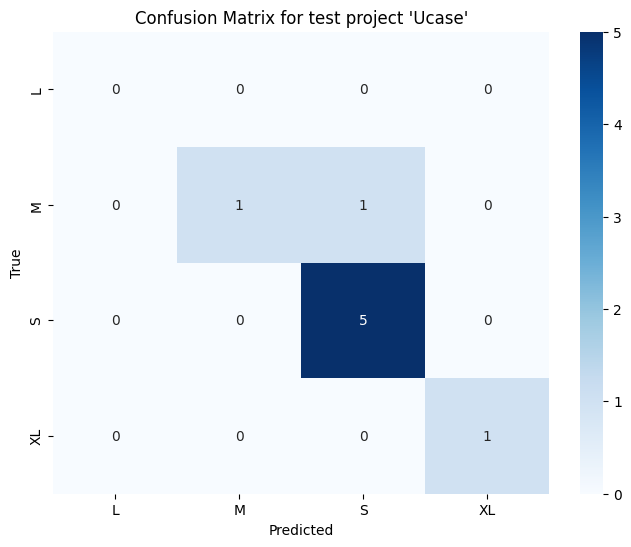

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.50      0.67         2
           S       0.83      1.00      0.91         5
          XL       0.00      0.00      0.00         1

   micro avg       0.86      0.75      0.80         8
   macro avg       0.46      0.38      0.39         8
weighted avg       0.77      0.75      0.73         8
 samples avg       0.75      0.75      0.75         8

Precision: 0.7708333333333334     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.7348484848484848

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

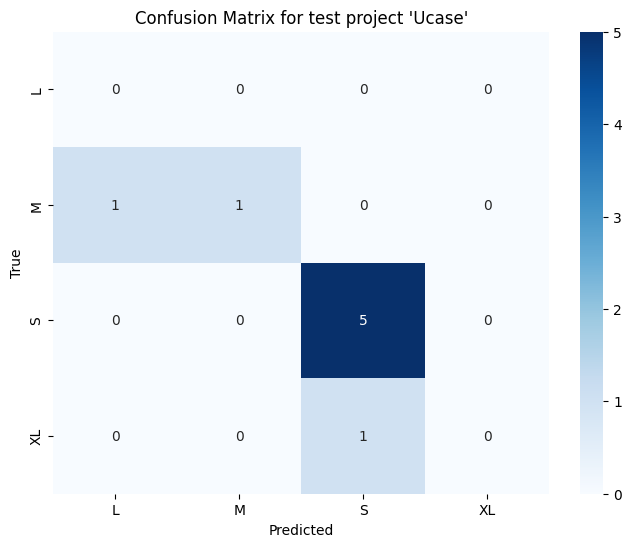

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.33      0.50         3
           S       0.80      1.00      0.89         8
          XL       1.00      1.00      1.00         2

   micro avg       0.85      0.85      0.85        13
   macro avg       0.70      0.58      0.60        13
weighted avg       0.88      0.85      0.82        13
 samples avg       0.85      0.85      0.85        13

Precision: 0.8769230769230769     Recall: 0.8461538461538461      Accuracy: 0.8461538461538461      F1 Score: 0.8162393162393162

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

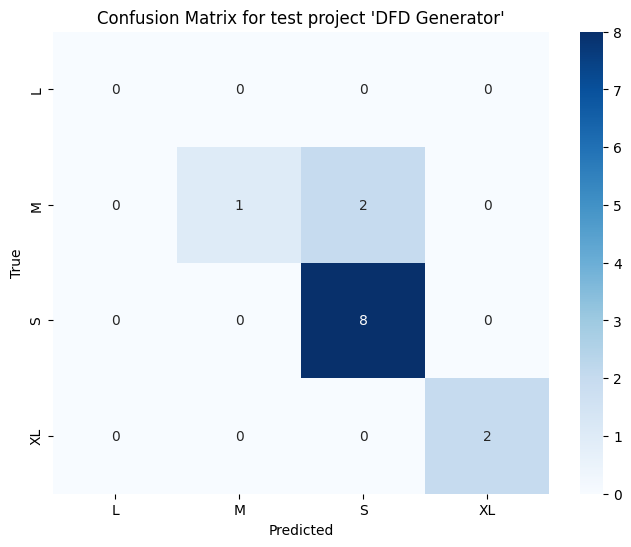

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.67      0.80         3
           S       0.73      1.00      0.84         8
          XL       1.00      1.00      1.00         2

   micro avg       0.80      0.92      0.86        13
   macro avg       0.68      0.67      0.66        13
weighted avg       0.83      0.92      0.86        13
 samples avg       0.85      0.92      0.87        13

Precision: 0.8321678321678322     Recall: 0.9230769230769231      Accuracy: 0.7692307692307693      F1 Score: 0.85668016194332

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

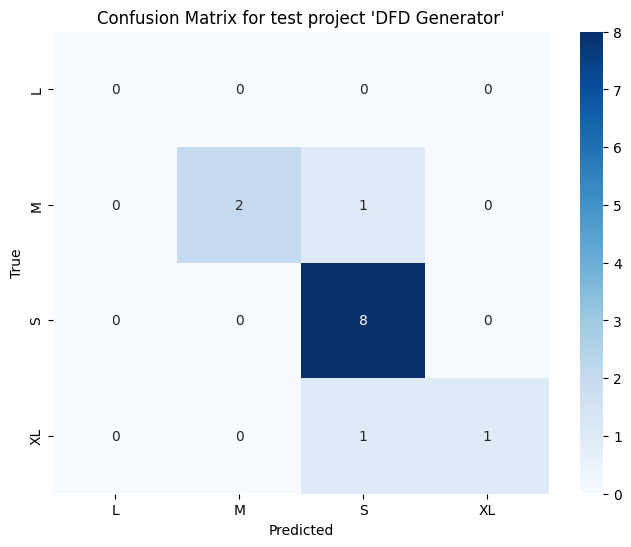

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.33      0.50         3
           S       0.73      1.00      0.84         8
          XL       0.00      0.00      0.00         2

   micro avg       0.75      0.69      0.72        13
   macro avg       0.43      0.33      0.34        13
weighted avg       0.68      0.69      0.63        13
 samples avg       0.69      0.69      0.69        13

Precision: 0.6783216783216783     Recall: 0.6923076923076923      Accuracy: 0.6923076923076923      F1 Score: 0.6336032388663967

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

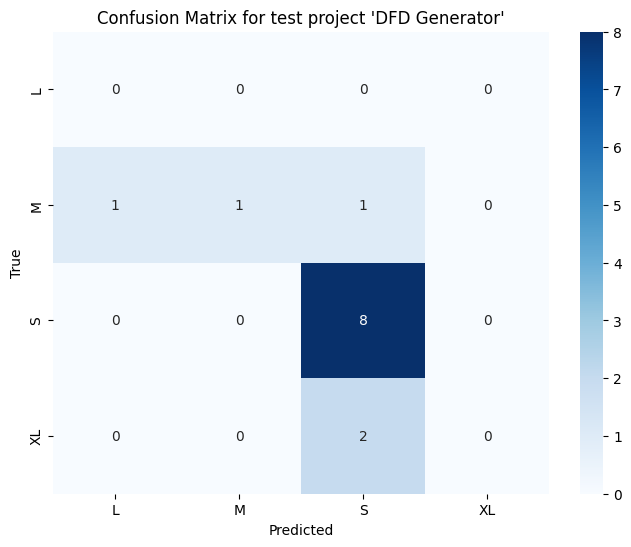

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      0.88      0.93         8
          XL       1.00      1.00      1.00         2

   micro avg       1.00      0.91      0.95        11
   macro avg       0.75      0.72      0.73        11
weighted avg       1.00      0.91      0.95        11
 samples avg       0.91      0.91      0.91        11

Precision: 1.0     Recall: 0.9090909090909091      Accuracy: 0.9090909090909091      F1 Score: 0.9515151515151515

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

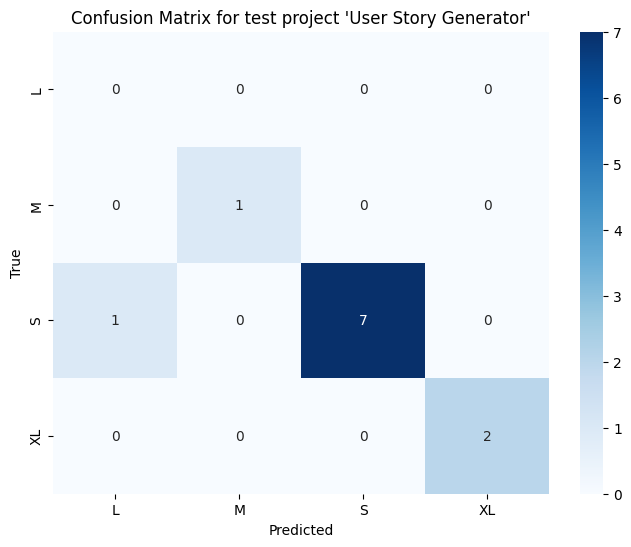

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.89      1.00      0.94         8
          XL       1.00      1.00      1.00         2

   micro avg       0.92      1.00      0.96        11
   macro avg       0.72      0.75      0.74        11
weighted avg       0.92      1.00      0.96        11
 samples avg       0.95      1.00      0.97        11

Precision: 0.9191919191919191     Recall: 1.0      Accuracy: 0.9090909090909091      F1 Score: 0.9572192513368983

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

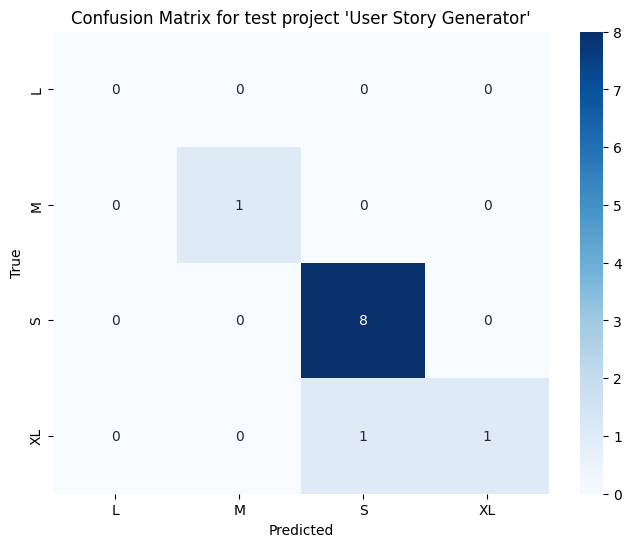

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.80      1.00      0.89         8
          XL       0.00      0.00      0.00         2

   micro avg       0.82      0.82      0.82        11
   macro avg       0.45      0.50      0.47        11
weighted avg       0.67      0.82      0.74        11
 samples avg       0.82      0.82      0.82        11

Precision: 0.6727272727272727     Recall: 0.8181818181818182      Accuracy: 0.8181818181818182      F1 Score: 0.7373737373737373

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

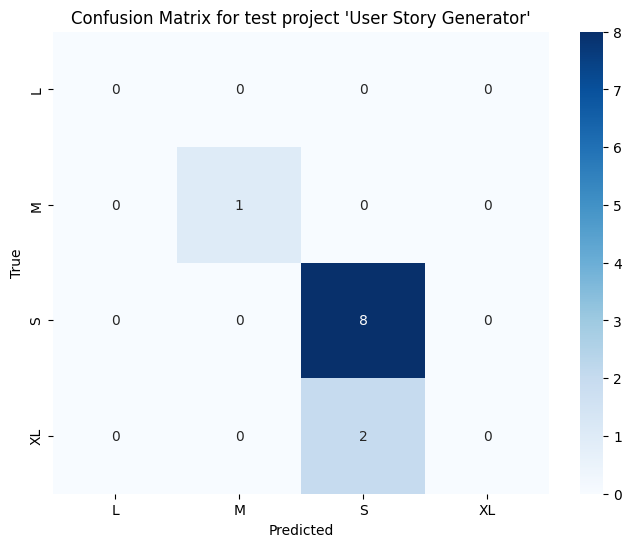

In [36]:
# Model TF-IDF User Story
accuracy_list_Adaboost_3 = []
accuracy_list_DecisionTree_3 = []
accuracy_list_MultinomialNB_3 = []
precision_list_Adaboost_3 = []
precision_list_DecisionTree_3 = []
precision_list_MultinomialNB_3 = []
recall_list_Adaboost_3 = []
recall_list_DecisionTree_3 = []
recall_list_MultinomialNB_3 = []
f1_score_list_Adaboost_3 = []
f1_score_list_DecisionTree_3 = []
f1_score_list_MultinomialNB_3 = []
mean_accuracy_3 = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())

# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    test_indices = test_project_data.index
    X_test = tfidf_df_scenario.loc[test_indices]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    train_indices = train_projects_data.index
    X_train = tfidf_df_scenario.loc[train_indices]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost_3.append(accuracy)
    precision_list_Adaboost_3.append(precision)
    recall_list_Adaboost_3.append(recall)
    f1_score_list_Adaboost_3.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree_3.append(accuracy)
    precision_list_DecisionTree_3.append(precision)
    recall_list_DecisionTree_3.append(recall)
    f1_score_list_DecisionTree_3.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB_3.append(accuracy)
    precision_list_MultinomialNB_3.append(precision)
    recall_list_MultinomialNB_3.append(recall)
    f1_score_list_MultinomialNB_3.append(f1)

In [37]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost_3': precision_list_Adaboost_3,
    'Recall_Adaboost_3': recall_list_Adaboost_3,
    'Accuracy_Adaboost_3': accuracy_list_Adaboost_3,
    'F1_Score_Adaboost_3': f1_score_list_Adaboost_3,
    'Precision_DecisionTree_3': precision_list_DecisionTree_3,
    'Recall_DecisionTree_3': recall_list_DecisionTree_3,
    'Accuracy_DecisionTree_3': accuracy_list_DecisionTree_3,
    'F1_Score_DecisionTree_3': f1_score_list_DecisionTree_3,
    'Precision_MultinomialNB_3': precision_list_MultinomialNB_3,
    'Recall_MultinomialNB_3': recall_list_MultinomialNB_3,
    'Accuracy_MultinomialNB_3': accuracy_list_MultinomialNB_3,
    'F1_Score_MultinomialNB_3': f1_score_list_MultinomialNB_3,
}

# Buat DataFrame
df_result_3 = pd.DataFrame(data)

# Tampilkan DataFrame
df_result_3


,Project,Precision_Adaboost_3,Recall_Adaboost_3,Accuracy_Adaboost_3,F1_Score_Adaboost_3,Precision_DecisionTree_3,Recall_DecisionTree_3,Accuracy_DecisionTree_3,F1_Score_DecisionTree_3,Precision_MultinomialNB_3,Recall_MultinomialNB_3,Accuracy_MultinomialNB_3,F1_Score_MultinomialNB_3
0,Akobesi,0.603458,0.629921,0.622047,0.557560,0.500187,0.629921,0.622047,0.553862,0.739095,0.708661,0.708661,0.595443
1,Jisebi Checker,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.888889,0.888889,0.888889,0.888889
2,Novelty Checker,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.827273,0.909091,0.909091,0.866029
3,Journal Database Reviewer,0.755208,0.875000,0.812500,0.803442,0.812500,0.625000,0.625000,0.703947,0.602679,0.750000,0.750000,0.667500
4,Git Trackr,0.466667,0.666667,0.666667,0.541667,0.416667,0.666667,0.500000,0.500000,0.300000,0.500000,0.500000,0.375000
5,Seareq,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,0.625000,0.750000,0.500000,0.500000,0.600000
6,Sales Monitoring on Multimarket,0.888889,0.611111,0.611111,0.650794,0.791667,0.666667,0.666667,0.619048,0.833333,0.722222,0.722222,0.666667
7,Ucase,0.895833,0.875000,0.875000,0.859848,0.895833,0.875000,0.875000,0.859848,0.770833,0.750000,0.750000,0.734848
8,DFD Generator,0.876923,0.846154,0.846154,0.816239,0.832168,0.923077,0.769231,0.856680,0.678322,0.692308,0.692308,0.633603
9,User Story Generator,1.000000,0.909091,0.909091,0.951515,0.919192,1.000000,0.909091,0.957219,0.672727,0.818182,0.818182,0.737374


In [38]:
# Mean Accuracy
mean_accuracy_3.append(np.mean(accuracy_list_Adaboost_3))
mean_accuracy_3.append(np.mean(accuracy_list_DecisionTree_3))
mean_accuracy_3.append(np.mean(accuracy_list_MultinomialNB_3))

print("Mean Accuracy")
print(mean_accuracy_3)

Mean Accuracy
[0.834256977711702, 0.7467035589082833, 0.7239352948014366]


In [39]:
# Export
data_mean = {
    "Mean 1": mean_accuracy,
    "Mean 2": mean_accuracy_2,
    "Mean 3": mean_accuracy_3,
}

# Buat DataFrame
df_mean = pd.DataFrame(data_mean)

# Simpan DataFrame ke dalam satu file Excel dengan sheet yang berbeda
with pd.ExcelWriter('output_text.xlsx') as writer:
    df.to_excel(writer, sheet_name='Output', index=False)
    df_result.to_excel(writer, sheet_name='Performance Report 1', index=False)
    df_result_2.to_excel(writer, sheet_name='Performance Report 2', index=False)
    df_result_3.to_excel(writer, sheet_name='Performance Report 3', index=False)
    df_mean.to_excel(writer, sheet_name='Mean Accuracy', index=False)
